## Project Team Id - PTID-CDS-AUG-23-1603

## Project Id - PRCP-1017-Autoprice Prediction

# Problem statement

 task 1:-Prepare a complete data analysis report on the given data.

 Task 2:-Create a predictive model by applying some data science techniques for the price of cars with the available independent variables. That should help the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels

####  business case:create a model which will help you to find a relationship between independent factors and price of cars.

In [1]:
# importing libraries.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("auto_imports.csv",header=None)

In [3]:
pd.set_option('display.max_columns',None)
data.head()

0    1            2    3    4     5            6    7      8     9      10  \
0   3    ?  alfa-romero  gas  std   two  convertible  rwd  front  88.6  168.8   
1   3    ?  alfa-romero  gas  std   two  convertible  rwd  front  88.6  168.8   
2   1    ?  alfa-romero  gas  std   two    hatchback  rwd  front  94.5  171.2   
3   2  164         audi  gas  std  four        sedan  fwd  front  99.8  176.6   
4   2  164         audi  gas  std  four        sedan  4wd  front  99.4  176.6   

     11    12    13    14    15   16    17    18    19    20   21    22  23  \
0  64.1  48.8  2548  dohc  four  130  mpfi  3.47  2.68   9.0  111  5000  21   
1  64.1  48.8  2548  dohc  four  130  mpfi  3.47  2.68   9.0  111  5000  21   
2  65.5  52.4  2823  ohcv   six  152  mpfi  2.68  3.47   9.0  154  5000  19   
3  66.2  54.3  2337   ohc  four  109  mpfi  3.19  3.40  10.0  102  5500  24   
4  66.4  54.3  2824   ohc  five  136  mpfi  3.19  3.40   8.0  115  5500  18   

   24     25  
0  27  13495  
1  27  16500  
2  26  16500  
3  30  13950  
4  22  17450

In [4]:
column_headers=['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']

In [5]:
data.columns=column_headers

In [6]:
data.head()

symboling normalized_losses         make fuel_type aspiration num_of_doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body_style drive_wheels engine_location  wheel_base  length  width  \
0  convertible          rwd           front        88.6   168.8   64.1   
1  convertible          rwd           front        88.6   168.8   64.1   
2    hatchback          rwd           front        94.5   171.2   65.5   
3        sedan          fwd           front        99.8   176.6   66.2   
4        sedan          4wd           front        99.4   176.6   66.4   

   height  curb_weight engine_type num_of_cylinders  engine_size fuel_system  \
0    48.8         2548        dohc             four          130        mpfi   
1    48.8         2548        dohc             four          130        mpfi   
2    52.4         2823        ohcv              six          152        mpfi   
3    54.3         2337         ohc             four          109        mpfi   
4    54.3         2824         ohc             five          136        mpfi   

   bore stroke  compression_ratio horsepower peak_rpm  city_mpg  highway_mpg  \
0  3.47   2.68                9.0        111     5000        21           27   
1  3.47   2.68                9.0        111     5000        21           27   
2  2.68   3.47                9.0        154     5000        19           26   
3  3.19   3.40               10.0        102     5500        24           30   
4  3.19   3.40                8.0        115     5500        18           22   

   price  
0  13495  
1  16500  
2  16500  
3  13950  
4  17450

In [7]:
#insight:

#  our target variable is price.

In [8]:
data.tail()

symboling normalized_losses   make fuel_type aspiration num_of_doors  \
196         -1                95  volvo       gas        std         four   
197         -1                95  volvo       gas      turbo         four   
198         -1                95  volvo       gas        std         four   
199         -1                95  volvo    diesel      turbo         four   
200         -1                95  volvo       gas      turbo         four   

    body_style drive_wheels engine_location  wheel_base  length  width  \
196      sedan          rwd           front       109.1   188.8   68.9   
197      sedan          rwd           front       109.1   188.8   68.8   
198      sedan          rwd           front       109.1   188.8   68.9   
199      sedan          rwd           front       109.1   188.8   68.9   
200      sedan          rwd           front       109.1   188.8   68.9   

     height  curb_weight engine_type num_of_cylinders  engine_size  \
196    55.5         2952         ohc             four          141   
197    55.5         3049         ohc             four          141   
198    55.5         3012        ohcv              six          173   
199    55.5         3217         ohc              six          145   
200    55.5         3062         ohc             four          141   

    fuel_system  bore stroke  compression_ratio horsepower peak_rpm  city_mpg  \
196        mpfi  3.78   3.15                9.5        114     5400        23   
197        mpfi  3.78   3.15                8.7        160     5300        19   
198        mpfi  3.58   2.87                8.8        134     5500        18   
199         idi  3.01   3.40               23.0        106     4800        26   
200        mpfi  3.78   3.15                9.5        114     5400        19   

     highway_mpg  price  
196           28  16845  
197           25  19045  
198           23  21485  
199           27  22470  
200           25  22625

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel_type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num_of_doors       201 non-null    object 
 6   body_style         201 non-null    object 
 7   drive_wheels       201 non-null    object 
 8   engine_location    201 non-null    object 
 9   wheel_base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    object 
 15  num_of_cylinders   201 non-null    object 
 16  engine_size        201 non

In [10]:
#insight:

#total rows are 201.
#total columnn are 25.(24:independent feaures and 1:dependent-target feature.)
#non-null values in all column.

In [11]:
data.shape

(201, 26)

In [12]:
data.describe()

symboling  wheel_base      length       width      height  \
count  201.000000  201.000000  201.000000  201.000000  201.000000   
mean     0.840796   98.797015  174.200995   65.889055   53.766667   
std      1.254802    6.066366   12.322175    2.101471    2.447822   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.800000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.500000   66.600000   55.500000   
max      3.000000  120.900000  208.100000   72.000000   59.800000   

       curb_weight  engine_size  compression_ratio    city_mpg  highway_mpg  \
count   201.000000   201.000000         201.000000  201.000000   201.000000   
mean   2555.666667   126.875622          10.164279   25.179104    30.686567   
std     517.296727    41.546834           4.004965    6.423220     6.815150   
min    1488.000000    61.000000           7.000000   13.000000    16.000000   
25%    2169.000000    98.000000           8.600000   19.000000    25.000000   
50%    2414.000000   120.000000           9.000000   24.000000    30.000000   
75%    2926.000000   141.000000           9.400000   30.000000    34.000000   
max    4066.000000   326.000000          23.000000   49.000000    54.000000   

              price  
count    201.000000  
mean   13207.129353  
std     7947.066342  
min     5118.000000  
25%     7775.000000  
50%    10295.000000  
75%    16500.000000  
max    45400.000000

In [13]:
#insights:

#symboling,wheel_base,length,width,height,compression_ratio,city_mpg,highway_mpg-these feature's mean is near to the 50% of the data and std is also less.we can expect normal distribution(bell-shaped) in this features.
#minimum value for price is 5118,maximum is 45400 and 50%  is 10295.std is also high in price ,so we expect there should be outliers.
#curb_weight has a high std(517).we can expect outlier in this also.
#engine_size has a high std(41).we can expect outlier in this also.
#all columns have different data range.so scaling is require.


In [14]:
data.describe(include='O')

normalized_losses    make fuel_type aspiration num_of_doors body_style  \
count                201     201       201        201          201        201   
unique                52      22         2          2            3          5   
top                    ?  toyota       gas        std         four      sedan   
freq                  37      32       181        165          113         94   

       drive_wheels engine_location engine_type num_of_cylinders fuel_system  \
count           201             201         201              201         201   
unique            3               2           6                7           8   
top             fwd           front         ohc             four        mpfi   
freq            118             198         145              157          92   

        bore stroke horsepower peak_rpm  
count    201    201        201      201  
unique    39     37         59       23  
top     3.62   3.40         68     5500  
freq      23     19         19       36

In [15]:
#insights
#invalid data in normalized_losses.maximum amount of data-frequency of normalized_losses(37 out of 201) are invalid.
# engine_location in front:198 out of 201.
# fuel_type of gas:181 out of 201

In [16]:
# univariate Analysis:
#pip install sweetviz

In [17]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [18]:
#insights from sweetviz report:

# 1. symboling:                 -3, -2, -1, 0, 1, 2, 3.
#                               (distinct-3%)
#
# 2. normalized-losses:         continuous from 65 to 256.
#                               (distinct-26%)
#
# 3. make:                      alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury,mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo
#                               (distinct-11%)
#
# 4. fuel-type:                 diesel, gas.
#                               (distinct-<1%)
#
# 5. aspiration:                std, turbo.
#                               (distinct-<1%)
#
# 6. num-of-doors:              four, two.
#                               (distinct-1%),invalid data-(?) is present
#
# 7. body-style:                hardtop, wagon, sedan, hatchback, convertible.
#                               (distinct-2%)
#
# 8. drive-wheels:              4wd, fwd, rwd.
#                               (distinct-1%)
#
# 9. engine-location:           front, rear.
#                               (distinct-<1%)
#
# 10. wheel-base:               continuous from 86.6 120.9.
#                               (distinct-26%)Positive kurtosis implies a leptokurtic distribution, meaning that the distribution has heavier tails and a more pronounced central peak compared to a normal distribution.
#                               skewness of 1.03 indicates that the data distribution is right-skewed, with most data points concentrated on the left and a longer tail on the right
#
# 11. length:                   continuous from 141.1 to 208.1.
#                               (distinct-36%),data appears to have a diverse set of distinct values, a distribution with lighter tails and a less pronounced central peak, and a right-skewed shape where most data points are clustered on the lower end of the range with some data points extending further to the right. 
#
# 12. width:                    continuous from 60.3 to 72.3.
#                               (distinct-21%), with a kurtosis of 0.67, we have a leptokurtic distribution with heavier tails and a more pronounced central peak compared to a normal distribution.
#                                a skewness of 0.87 indicates that the data distribution is right-skewed, with most data points concentrated on the left and a longer tail on the right. 
#
# 13. height:                   continuous from 47.8 to 59.8.
#                               (distinct-24%) a kurtosis of -0.433 indicates that we have a platykurtic distribution with lighter tails, suggesting fewer extreme values and a more even spread of data.
#                                skewness of 0.029 indicates that the data distribution is very close to being symmetric, with only a slight tendency for positive skew. 
#
# 14. curb-weight:              continuous from 1488 to 4066.
#                               (distinct-84%)it implies that we have a wide variety of unique values. Positive kurtosis may indicate the presence of outliers or a more peaked distribution, and positive skewness suggests that the data is concentrated more on the right side of the distribution.
#
# 15. engine-type:              dohc(26%),l(6%), ohc(72%), ohcf(7%), ohcv(6%), rotor(2%).
#                               (distinct-3%)
#
# 16. num-of-cylinders:         eight, five, four(78%), six, three(<1%), twelve(<1%), two.
#                               (distinct-3%)
#
# 17. engine-size:              continuous from 61 to 326.
#                               (distinct-21%)a kurtosis value of 5.5 suggests a distribution with very heavy tails and a high peak, potentially indicating the presence of outliers. The positive skewness of 1.98 suggests that the data is skewed to the right, with a long tail on the right side.
#
# 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
#                               (distinct-4%),mpfi-46%,mfi and spfi-<1%
#
# 19. bore:                     continuous from 2.54 to 3.94.
#                               (distinct-19%)(uniq value 3.62-11%)
#
# 20. stroke:                   continuous from 2.07 to 4.17.
#                               (distinct-18%)(uniq value 3.4-9%)
#
# 21. compression-ratio:        continuous from 7 to 23.
#                               (distinct-16%) a kurtosis value of 5.07 suggests a distribution with very heavy tails and a very high peak, which may indicate the presence of outliers or extreme values. The high positive skewness of 2.58 suggests that the data is highly skewed to the right, with a long tail on the right side.
#
# 22. horsepower:               continuous from 48 to 288.
#                               (distinct-29%)
# 23. peak-rpm:                 continuous from 4150 to 6600.
#                               (distinct-11%)
#
# 24. city-mpg:                 continuous from 13 to 49.
#                               (distinct-14%)a kurtosis value of 0.7 suggests a distribution with lighter tails and less peakedness, indicating a relatively normal-like shape. The positive skewness of 0.6 suggests that the data is positively skewed but not to a high degree.
#                                             
# 25. highway-mpg:              continuous from 16 to 54.
#                               (distinct-15%)when both kurtosis and skewness are 0.5, it indicates a distribution with lighter tails and a flatter peak compared to a normal distribution, which suggests that the dataset is less likely to have extreme outliers or heavy tails.
#                                            The positive skewness indicates that the data is positively skewed, with more values on the left side of the distribution.
#
# 26. price:                    continuous from 5118 to 45400.
#                               (distinct-93%)price is is highly distinctive, with 93% of the values being unique. The positive kurtosis value suggests that the dataset has heavier tails and a higher peak compared to a normal distribution, possibly indicating the presence of outliers. 
#                                             the positive skewness indicates that the data is positively skewed, with more values on the left side of the distribution.

In [19]:
#check null value:
data.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [20]:
data.fuel_system.value_counts()


mpfi    92
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel_system, dtype: int64

In [21]:
data.num_of_cylinders.value_counts()


four      157
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: num_of_cylinders, dtype: int64

In [22]:
data.num_of_doors.value_counts() 

four    113
two      86
?         2
Name: num_of_doors, dtype: int64

In [23]:
# invalid data in num_of _doors.we have convert them to median values.

In [24]:
data.engine_type.value_counts()


ohc      145
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
Name: engine_type, dtype: int64

In [25]:
data.body_style.value_counts()


sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body_style, dtype: int64

In [26]:
data.make.value_counts()
#{'toyoto':1,'nissan':2,'mazda':3,'mitsubishi':4,'honda':5,'volkswagen':6,'subaru':7,'peugot':8,'volvo':9,'dodge':10,'mercedes-benz':11,'bmw':12,'plymouth':13,'audi':14,'saab':15,'porsche':16,'jaguar':17,'chevrolet':18,'alfa-romero':19,'isuzu':20,'renault':21,'mercury':22}

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64

In [27]:
data.symboling.value_counts()

 0    65
 1    52
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [28]:
data.normalized_losses.value_counts() # maximum amount of value is missing/corrupted.
# find the meaning of normalized_losses.

?      37
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized_losses, dtype: int64

In [29]:
data.price.value_counts()

8921     2
18150    2
8845     2
8495     2
7609     2
        ..
45400    1
16503    1
5389     1
6189     1
22625    1
Name: price, Length: 186, dtype: int64

In [30]:
# Convert the 'column_name' to int64 data type
data['normalized_losses'] = data['normalized_losses'].replace('?',np.nan)
data['normalized_losses'] = data['normalized_losses'].astype(float)

mean_normalized_losses=data['normalized_losses'].mean()
data['normalized_losses'].fillna(mean_normalized_losses,inplace=True)

data['normalized_losses']=data['normalized_losses'].astype(int)
#data.drop(['normalized_losses'],axis=1,inplace=True)


In [31]:
data.num_of_doors=data.num_of_doors.map({'two':2,'four':4,'?':4})

In [32]:
#Replace non-numeric values with NaN
# 
data['bore'] = pd.to_numeric(data['bore'],errors='coerce')
data['stroke'] = pd.to_numeric(data['stroke'],errors='coerce')
data['horsepower'] = pd.to_numeric(data['horsepower'],errors='coerce')
data['peak_rpm'] = pd.to_numeric(data['peak_rpm'],errors='coerce')



In [33]:
# Calculate the median of the 4 column
median_bore = data['bore'].median()
median_stroke = data['stroke'].median()
median_horsepower = data['horsepower'].median()
median_peak_rpm = data['peak_rpm'].median()




# Replace NaN values in the 5 column with the median
data['bore'].fillna(median_bore, inplace=True)
data['stroke'].fillna(median_stroke, inplace=True)
data['horsepower'].fillna(median_horsepower, inplace=True)
data['peak_rpm'].fillna(median_peak_rpm, inplace=True)



In [34]:
## Create a new dataframe with categorical variables only(Check the datatype by using info function)
data1=data[['make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels','engine_location','engine_type','num_of_cylinders','fuel_system']]
data1

make fuel_type aspiration  num_of_doors   body_style drive_wheels  \
0    alfa-romero       gas        std             2  convertible          rwd   
1    alfa-romero       gas        std             2  convertible          rwd   
2    alfa-romero       gas        std             2    hatchback          rwd   
3           audi       gas        std             4        sedan          fwd   
4           audi       gas        std             4        sedan          4wd   
..           ...       ...        ...           ...          ...          ...   
196        volvo       gas        std             4        sedan          rwd   
197        volvo       gas      turbo             4        sedan          rwd   
198        volvo       gas        std             4        sedan          rwd   
199        volvo    diesel      turbo             4        sedan          rwd   
200        volvo       gas      turbo             4        sedan          rwd   

    engine_location engine_type num_of_cylinders fuel_system  
0             front        dohc             four        mpfi  
1             front        dohc             four        mpfi  
2             front        ohcv              six        mpfi  
3             front         ohc             four        mpfi  
4             front         ohc             five        mpfi  
..              ...         ...              ...         ...  
196           front         ohc             four        mpfi  
197           front         ohc             four        mpfi  
198           front        ohcv              six        mpfi  
199           front         ohc              six         idi  
200           front         ohc             four        mpfi  

[201 rows x 10 columns]

In [35]:
data1.shape

(201, 10)

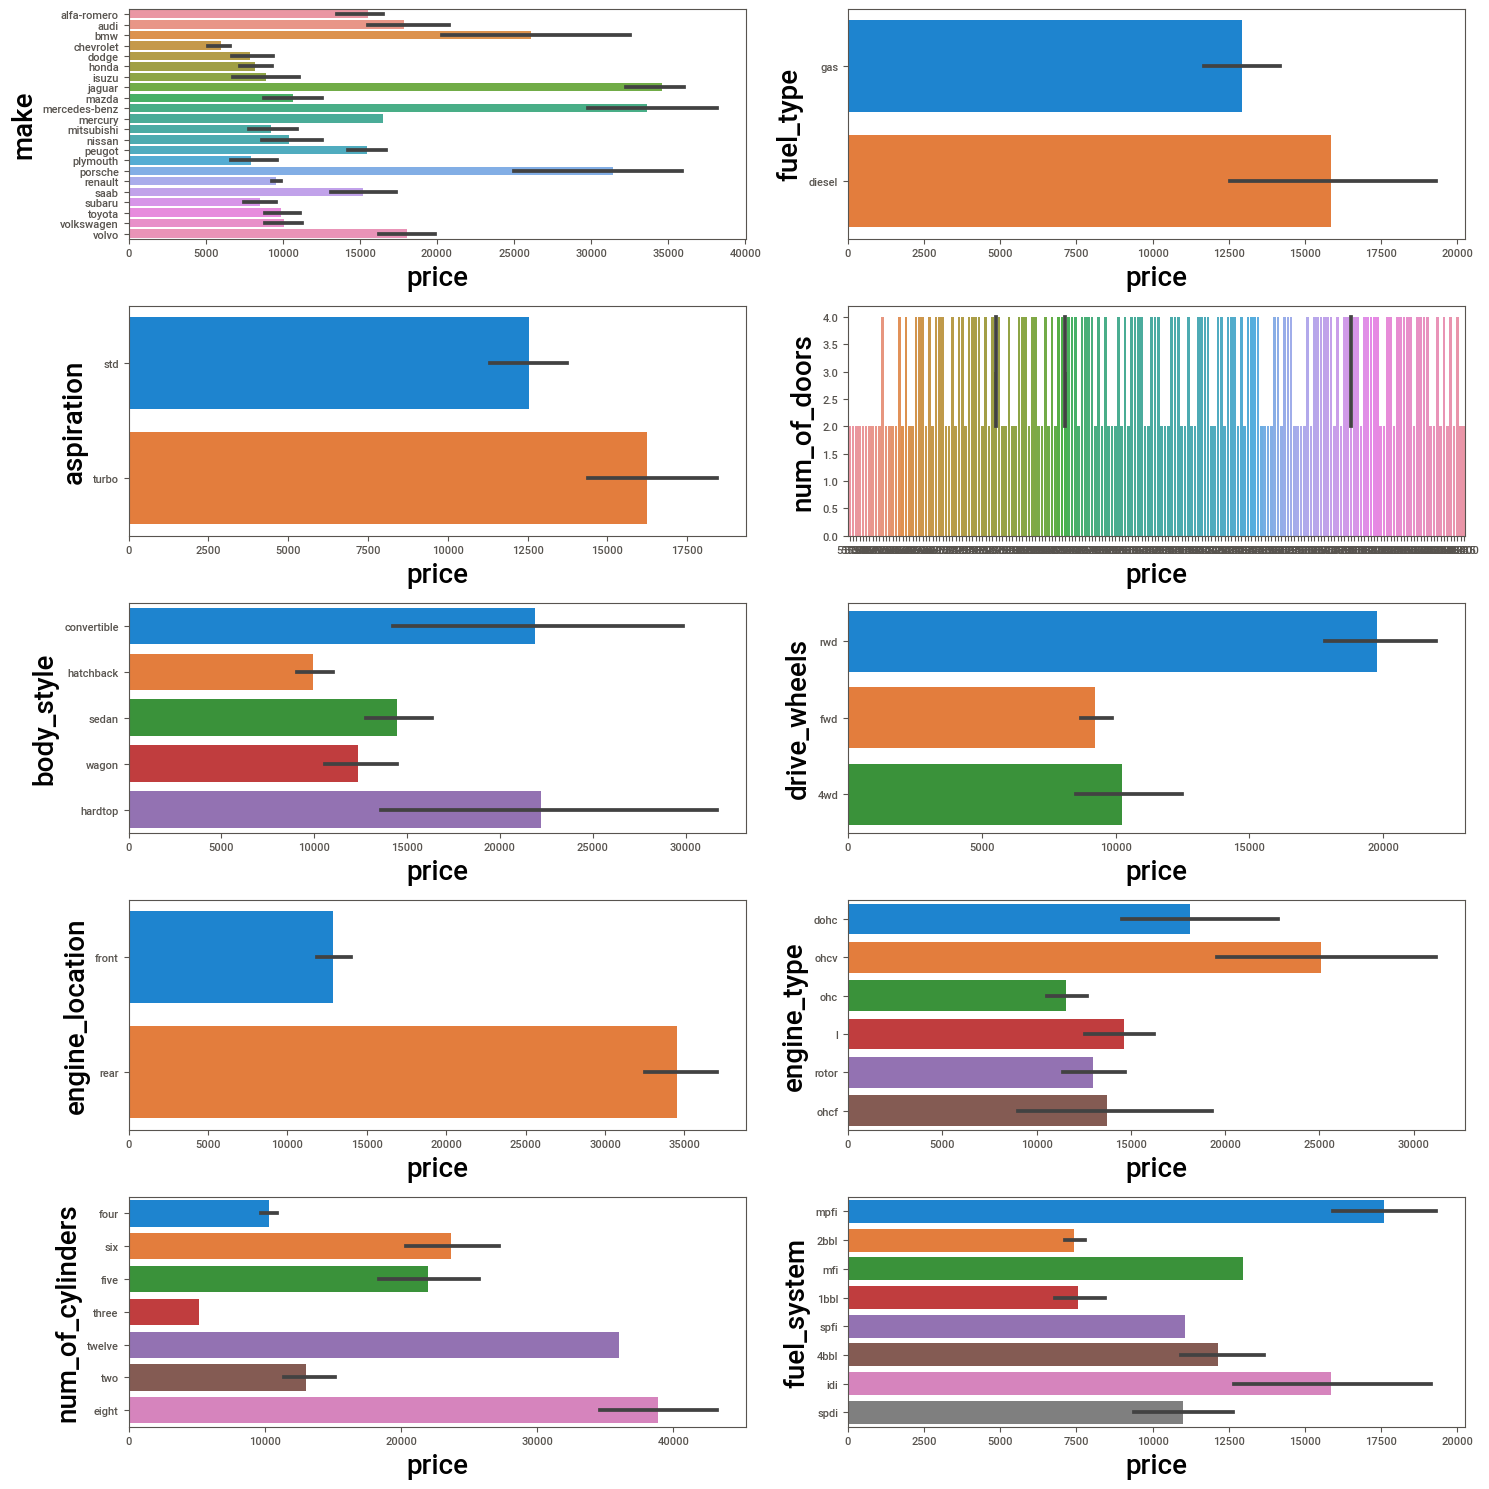

In [36]:
#bivariate Analysis:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1

for column in data1:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.barplot(x=data['price'],y=data[column])
        plt.xlabel('price',fontsize=20)
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [37]:
# insights from above diagram:
# more number of cylinders,more price.
# car with ochv type of engine has a higher price.
#car with front engine has a low price.
# hardtop and convertible car have more price.
#num_of_door doesnot affect the price of cars.
# jaguar,mercedes_benz and porsche car model have more price.

In [38]:
#neumerical data
data2=data[['symboling','wheel_base','length','width','height','curb_weight','engine_size','compression_ratio','city_mpg','highway_mpg']]

In [39]:
data2.shape

(201, 10)

In [40]:
plt.figure(figsize=(25,55),facecolor='white')
plotnumber=1
for column in data2.columns:
    if plotnumber<=10:
        ax=plt.subplot(15,2,plotnumber)
        sns.countplot(data=data,x=column,hue='price',ax=ax)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('price',fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

"plt.figure(figsize=(25,55),facecolor='white')\nplotnumber=1\nfor column in data2.columns:\n    if plotnumber<=10:\n        ax=plt.subplot(15,2,plotnumber)\n        sns.countplot(data=data,x=column,hue='price',ax=ax)\n        plt.xlabel(column,fontsize=20)\n        plt.ylabel('price',fontsize=20)\n    plotnumber+=1\nplt.tight_layout()\nplt.show()"

In [41]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()


columns_to_encode = [ 'fuel_type', 'aspiration','engine_location']


# Apply label encoding to each column in the list
data[columns_to_encode] = data[columns_to_encode].apply(label_encoder.fit_transform)

In [42]:
data.make=data.make.map({'toyota':1,'nissan':2,'mazda':3,'mitsubishi':4,'honda':5,'volkswagen':6,'subaru':7,'peugot':8,'volvo':9,'dodge':10,'mercedes-benz':11,'bmw':12,'plymouth':13,'audi':14,'saab':15,'porsche':16,'jaguar':17,'chevrolet':18,'alfa-romero':19,'isuzu':20,'renault':21,'mercury':22})

In [43]:
data.fuel_system=data.fuel_system.map({'mpfi':1,'2bbl':'2','idi':3,'1bbl':4,'spdi':5,'4bbl':6,'mfi':7,'spfi':8})

In [44]:
data.num_of_cylinders=data.num_of_cylinders.map({'four':1,'six':2,'five':3,'two':4,'eight':'5','three':6,'twelve':7})

In [45]:
data.engine_type=data.engine_type.map({'ohc':1,'ohcf':2,'ohcv':3,'dohc':4,'l':5,'rotor':6})

In [46]:
data.body_style=data.body_style.map({'sedan':1,'hatchback':2,'wagon':3,'hardtop':4,'convertible':5})

In [47]:
# one hot encoding
data3=pd.get_dummies(data['drive_wheels'], prefix='drive_wheels',drop_first=True)
data= pd.concat([data,data3], axis=1).drop(['drive_wheels'],axis=1)

In [48]:
# one hot encoding
data4=pd.get_dummies(data['num_of_doors'], prefix='num_of_doors',drop_first=True)
data= pd.concat([data,data4], axis=1).drop(['num_of_doors'],axis=1)

In [49]:
pd.set_option('display.max_column',None)
data

symboling  normalized_losses  make  fuel_type  aspiration  body_style  \
0            3                122    19          1           0           5   
1            3                122    19          1           0           5   
2            1                122    19          1           0           2   
3            2                164    14          1           0           1   
4            2                164    14          1           0           1   
..         ...                ...   ...        ...         ...         ...   
196         -1                 95     9          1           0           1   
197         -1                 95     9          1           1           1   
198         -1                 95     9          1           0           1   
199         -1                 95     9          0           1           1   
200         -1                 95     9          1           1           1   

     engine_location  wheel_base  length  width  height  curb_weight  \
0                  0        88.6   168.8   64.1    48.8         2548   
1                  0        88.6   168.8   64.1    48.8         2548   
2                  0        94.5   171.2   65.5    52.4         2823   
3                  0        99.8   176.6   66.2    54.3         2337   
4                  0        99.4   176.6   66.4    54.3         2824   
..               ...         ...     ...    ...     ...          ...   
196                0       109.1   188.8   68.9    55.5         2952   
197                0       109.1   188.8   68.8    55.5         3049   
198                0       109.1   188.8   68.9    55.5         3012   
199                0       109.1   188.8   68.9    55.5         3217   
200                0       109.1   188.8   68.9    55.5         3062   

     engine_type num_of_cylinders  engine_size fuel_system  bore  stroke  \
0              4                1          130           1  3.47    2.68   
1              4                1          130           1  3.47    2.68   
2              3                2          152           1  2.68    3.47   
3              1                1          109           1  3.19    3.40   
4              1                3          136           1  3.19    3.40   
..           ...              ...          ...         ...   ...     ...   
196            1                1          141           1  3.78    3.15   
197            1                1          141           1  3.78    3.15   
198            3                2          173           1  3.58    2.87   
199            1                2          145           3  3.01    3.40   
200            1                1          141           1  3.78    3.15   

     compression_ratio  horsepower  peak_rpm  city_mpg  highway_mpg  price  \
0                  9.0       111.0    5000.0        21           27  13495   
1                  9.0       111.0    5000.0        21           27  16500   
2                  9.0       154.0    5000.0        19           26  16500   
3                 10.0       102.0    5500.0        24           30  13950   
4                  8.0       115.0    5500.0        18           22  17450   
..                 ...         ...       ...       ...          ...    ...   
196                9.5       114.0    5400.0        23           28  16845   
197                8.7       160.0    5300.0        19           25  19045   
198                8.8       134.0    5500.0        18           23  21485   
199               23.0       106.0    4800.0        26           27  22470   
200                9.5       114.0    5400.0        19           25  22625   

     drive_wheels_fwd  drive_wheels_rwd  num_of_doors_4  
0                   0                 1               0  
1                   0                 1               0  
2                   0                 1               0  
3                   1                 0               1  
4                   0                 0               1  
..   

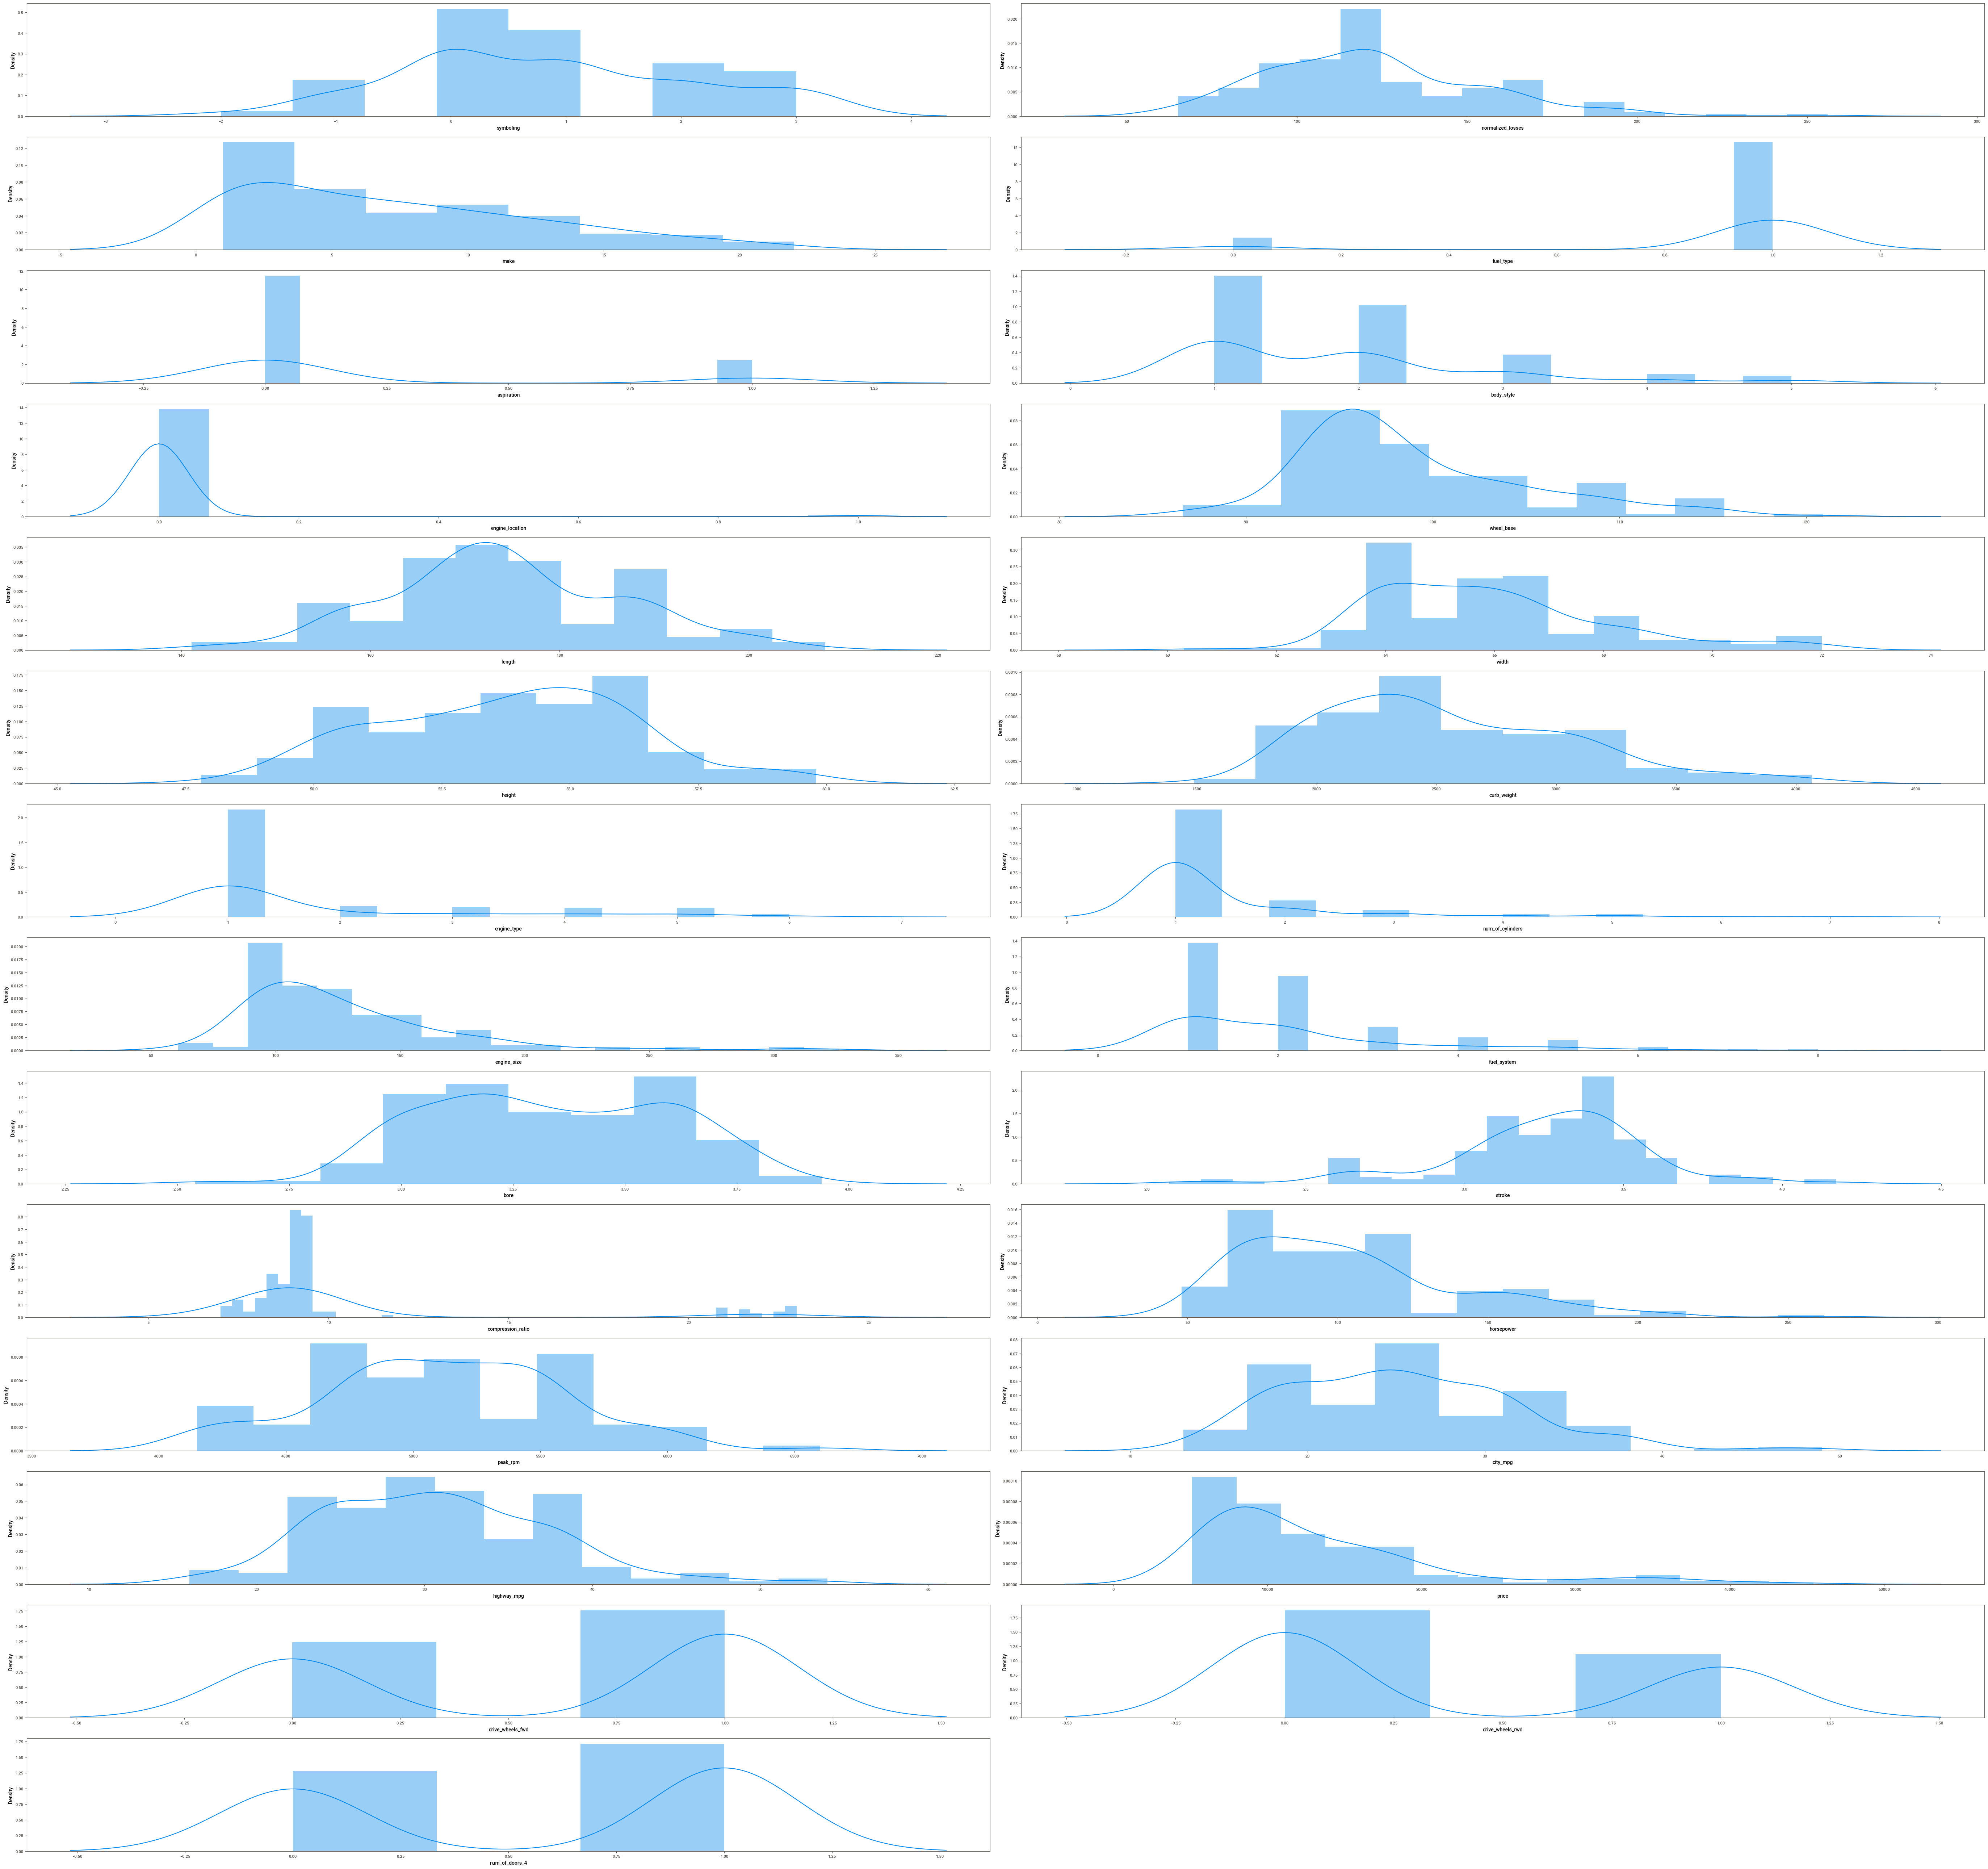

In [50]:
plt.figure(figsize=(55,55),facecolor='white')
plotnum=1
for c in data:
    if(plotnum<30):
        a=plt.subplot(15,2,plotnum)
        sns.distplot(data[c])
    plotnum+=1
plt.tight_layout() 


In [51]:
for c in data.columns:#columns form datasets
    if(data[c].dtype==object):#checking datatype of labels
        print(c)#categorical columns

num_of_cylinders
fuel_system


In [52]:
data['num_of_cylinders']=data['num_of_cylinders'].astype(int)
data['fuel_system']=data['fuel_system'].astype(int)

In [53]:
data

symboling  normalized_losses  make  fuel_type  aspiration  body_style  \
0            3                122    19          1           0           5   
1            3                122    19          1           0           5   
2            1                122    19          1           0           2   
3            2                164    14          1           0           1   
4            2                164    14          1           0           1   
..         ...                ...   ...        ...         ...         ...   
196         -1                 95     9          1           0           1   
197         -1                 95     9          1           1           1   
198         -1                 95     9          1           0           1   
199         -1                 95     9          0           1           1   
200         -1                 95     9          1           1           1   

     engine_location  wheel_base  length  width  height  curb_weight  \
0                  0        88.6   168.8   64.1    48.8         2548   
1                  0        88.6   168.8   64.1    48.8         2548   
2                  0        94.5   171.2   65.5    52.4         2823   
3                  0        99.8   176.6   66.2    54.3         2337   
4                  0        99.4   176.6   66.4    54.3         2824   
..               ...         ...     ...    ...     ...          ...   
196                0       109.1   188.8   68.9    55.5         2952   
197                0       109.1   188.8   68.8    55.5         3049   
198                0       109.1   188.8   68.9    55.5         3012   
199                0       109.1   188.8   68.9    55.5         3217   
200                0       109.1   188.8   68.9    55.5         3062   

     engine_type  num_of_cylinders  engine_size  fuel_system  bore  stroke  \
0              4                 1          130            1  3.47    2.68   
1              4                 1          130            1  3.47    2.68   
2              3                 2          152            1  2.68    3.47   
3              1                 1          109            1  3.19    3.40   
4              1                 3          136            1  3.19    3.40   
..           ...               ...          ...          ...   ...     ...   
196            1                 1          141            1  3.78    3.15   
197            1                 1          141            1  3.78    3.15   
198            3                 2          173            1  3.58    2.87   
199            1                 2          145            3  3.01    3.40   
200            1                 1          141            1  3.78    3.15   

     compression_ratio  horsepower  peak_rpm  city_mpg  highway_mpg  price  \
0                  9.0       111.0    5000.0        21           27  13495   
1                  9.0       111.0    5000.0        21           27  16500   
2                  9.0       154.0    5000.0        19           26  16500   
3                 10.0       102.0    5500.0        24           30  13950   
4                  8.0       115.0    5500.0        18           22  17450   
..                 ...         ...       ...       ...          ...    ...   
196                9.5       114.0    5400.0        23           28  16845   
197                8.7       160.0    5300.0        19           25  19045   
198                8.8       134.0    5500.0        18           23  21485   
199               23.0       106.0    4800.0        26           27  22470   
200                9.5       114.0    5400.0        19           25  22625   

     drive_wheels_fwd  drive_wheels_rwd  num_of_doors_4  
0                   0                 1               0  
1                   0                 1               0  
2                   0                 1               0  
3                   1                 0               1  
4                   0                 0

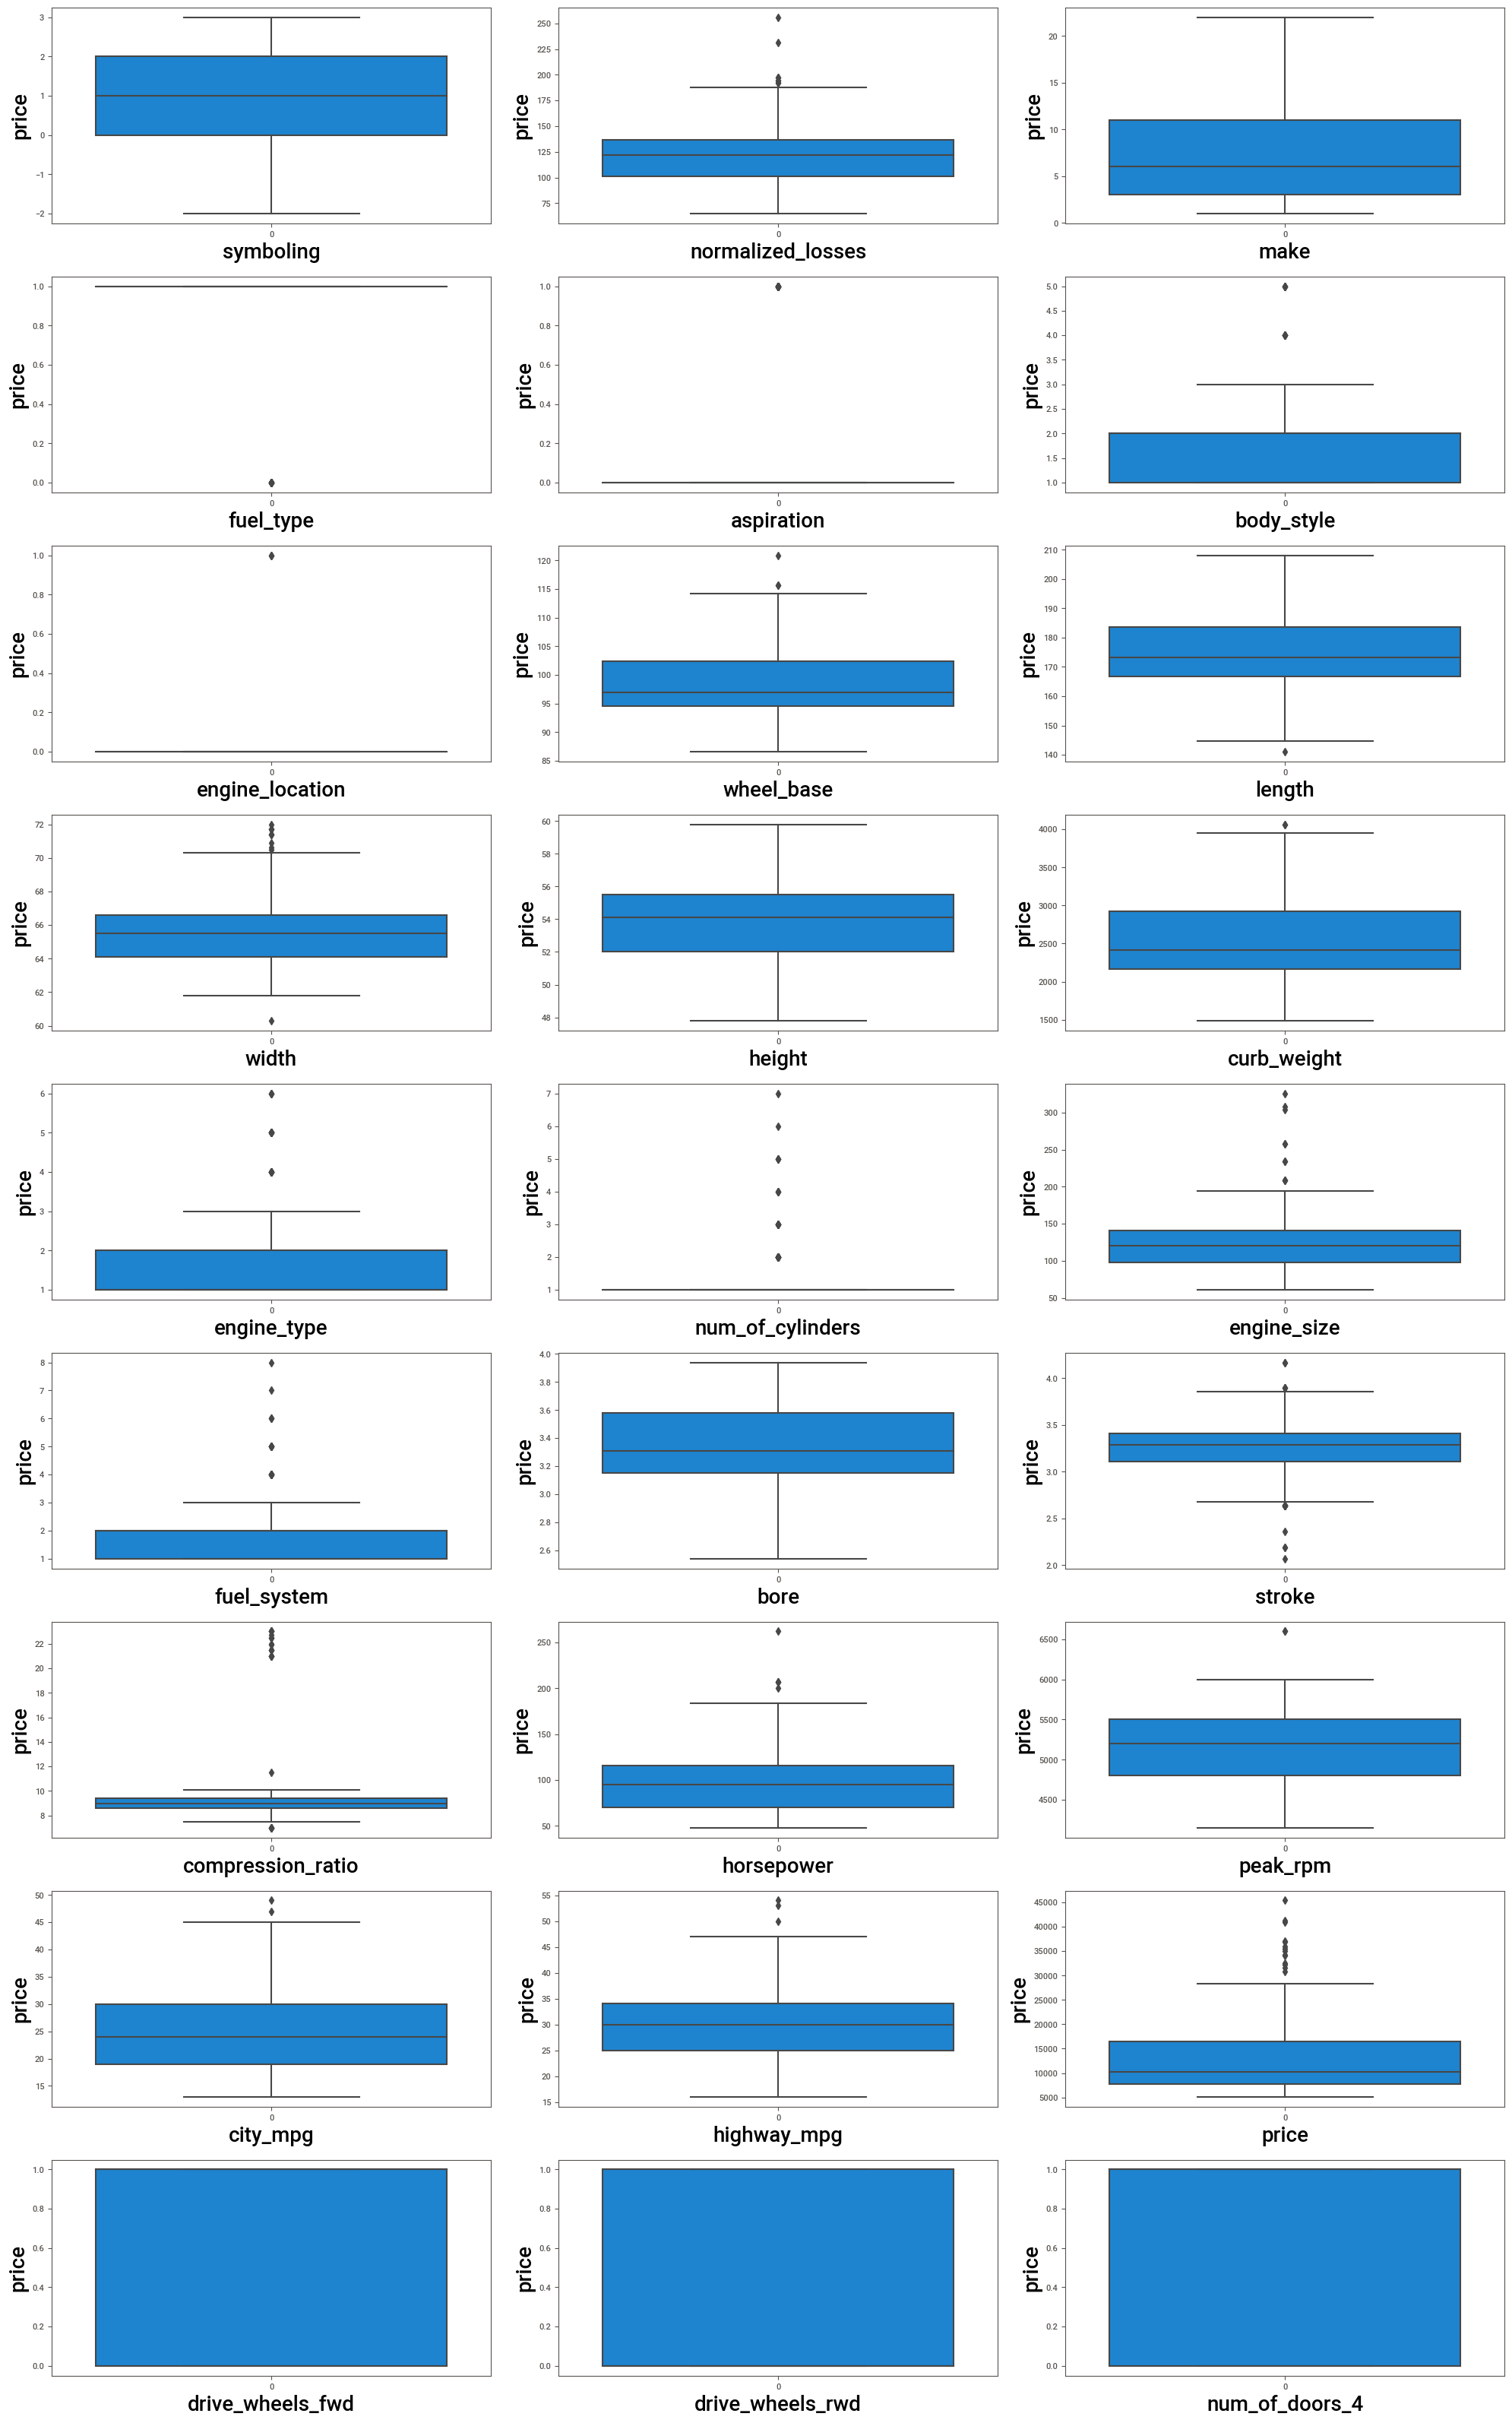

In [54]:
## Checking the outliers
plt.figure(figsize=(20,35),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=30:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Outlier Handling


In [55]:
#outlier handling for engine_location and its not a normal so we use IQR range
from scipy import stats#import stats to calculat mod

IQR = stats.iqr(data.engine_location, interpolation = 'midpoint') #calculating Inter quantile range

IQR

0.0

In [56]:
Q1=data.engine_location.quantile(0.25)#defining 25% of data
Q3=data.engine_location.quantile(0.75)##defining 75% of data
min_limit=Q1 - 1.5*IQR#setting minimum limit


max_limit=Q3 + 1.5*IQR#setting maximum limit
print(min_limit,',',max_limit)

0.0 , 0.0


In [57]:
data.loc[data['engine_location']<min_limit] #checking values which are less than minimum limit

Empty DataFrame
Columns: [symboling, normalized_losses, make, fuel_type, aspiration, body_style, engine_location, wheel_base, length, width, height, curb_weight, engine_type, num_of_cylinders, engine_size, fuel_system, bore, stroke, compression_ratio, horsepower, peak_rpm, city_mpg, highway_mpg, price, drive_wheels_fwd, drive_wheels_rwd, num_of_doors_4]
Index: []

In [58]:
data.loc[data['engine_location']>max_limit] #checking values which are greater than maximum limit

symboling  normalized_losses  make  fuel_type  aspiration  body_style  \
123          3                122    16          1           0           4   
124          3                122    16          1           0           4   
125          3                122    16          1           0           5   

     engine_location  wheel_base  length  width  height  curb_weight  \
123                1        89.5   168.9   65.0    51.6         2756   
124                1        89.5   168.9   65.0    51.6         2756   
125                1        89.5   168.9   65.0    51.6         2800   

     engine_type  num_of_cylinders  engine_size  fuel_system  bore  stroke  \
123            2                 2          194            1  3.74     2.9   
124            2                 2          194            1  3.74     2.9   
125            2                 2          194            1  3.74     2.9   

     compression_ratio  horsepower  peak_rpm  city_mpg  highway_mpg  price  \
123                9.5       207.0    5900.0        17           25  32528   
124                9.5       207.0    5900.0        17           25  34028   
125                9.5       207.0    5900.0        17           25  37028   

     drive_wheels_fwd  drive_wheels_rwd  num_of_doors_4  
123                 0                 1               0  
124                 0                 1               0  
125                 0                 1               0

In [59]:
# outliers in compression_ratio

In [60]:
IQR = stats.iqr(data.compression_ratio, interpolation = 'midpoint') #calculating Inter quantile range

IQR

0.8000000000000007

In [61]:
Q1=data.compression_ratio.quantile(0.25)#defining 25% of data
Q3=data.compression_ratio.quantile(0.75)##defining 75% of data
min_limit=Q1 - 1.5*IQR#setting minimum limit


max_limit=Q3 + 1.5*IQR#setting maximum limit
print(min_limit,',',max_limit)

7.399999999999999 , 10.600000000000001


In [62]:
data.loc[data['compression_ratio']<min_limit] #checking values which are less than minimum limit

symboling  normalized_losses  make  fuel_type  aspiration  body_style  \
28           3                145    10          1           1           2   
79           3                122     4          1           1           2   
80           3                122     4          1           1           2   
81           3                122     4          1           1           2   
114          0                161     8          1           1           1   
121          3                122    13          1           1           2   

     engine_location  wheel_base  length  width  height  curb_weight  \
28                 0        95.9   173.2   66.3    50.2         2811   
79                 0        95.9   173.2   66.3    50.2         2833   
80                 0        95.9   173.2   66.3    50.2         2921   
81                 0        95.9   173.2   66.3    50.2         2926   
114                0       108.0   186.7   68.3    56.0         3130   
121                0        95.9   173.2   66.3    50.2         2818   

     engine_type  num_of_cylinders  engine_size  fuel_system  bore  stroke  \
28             1                 1          156            7  3.60    3.90   
79             1                 1          156            5  3.58    3.86   
80             1                 1          156            5  3.59    3.86   
81             1                 1          156            5  3.59    3.86   
114            5                 1          134            1  3.61    3.21   
121            1                 1          156            5  3.59    3.86   

     compression_ratio  horsepower  peak_rpm  city_mpg  highway_mpg  price  \
28                 7.0       145.0    5000.0        19           24  12964   
79                 7.0       145.0    5000.0        19           24  12629   
80                 7.0       145.0    5000.0        19           24  14869   
81                 7.0       145.0    5000.0        19           24  14489   
114                7.0       142.0    5600.0        18           24  18150   
121                7.0       145.0    5000.0        19           24  12764   

     drive_wheels_fwd  drive_wheels_rwd  num_of_doors_4  
28                  1                 0               0  
79                  1                 0               0  
80                  1                 0               0  
81                  1                 0               0  
114                 0                 1               1  
121                 0                 1               0

In [63]:
data.loc[data['compression_ratio']>max_limit] #checking values which are greater than maximum limit

symboling  normalized_losses  make  fuel_type  aspiration  body_style  \
46           0                122    17          1           0           1   
60           0                122     3          0           0           1   
63           0                122     3          0           0           1   
64          -1                 93    11          0           1           1   
65          -1                 93    11          0           1           3   
66           0                 93    11          0           1           4   
67          -1                 93    11          0           1           1   
87           1                128     2          0           0           1   
105          0                161     8          0           1           1   
107          0                122     8          0           1           3   
109          0                161     8          0           1           1   
111          0                122     8          0           1           3   
113          0                161     8          0           1           1   
154          0                 91     1          0           0           1   
155          0                 91     1          0           0           2   
170         -1                 65     1          0           1           1   
178          2                122     6          0           0           1   
180          2                 94     6          0           0           1   
183          2                 94     6          0           1           1   
188          0                122     6          0           1           1   
199         -1                 95     9          0           1           1   

     engine_location  wheel_base  length  width  height  curb_weight  \
46                 0       102.0   191.7   70.6    47.8         3950   
60                 0        98.8   177.8   66.5    55.5         2443   
63                 0       104.9   175.0   66.1    54.4         2700   
64                 0       110.0   190.9   70.3    56.5         3515   
65                 0       110.0   190.9   70.3    58.7         3750   
66                 0       106.7   187.5   70.3    54.9         3495   
67                 0       115.6   202.6   71.7    56.3         3770   
87                 0        94.5   165.3   63.8    54.5         2017   
105                0       107.9   186.7   68.4    56.7         3197   
107                0       114.2   198.9   68.4    58.7         3430   
109                0       107.9   186.7   68.4    56.7         3252   
111                0       114.2   198.9   68.4    58.7         3485   
113                0       107.9   186.7   68.4    56.7         3252   
154                0        95.7   166.3   64.4    53.0         2275   
155                0        95.7   166.3   64.4    52.8         2275   
170                0       102.4   175.6   66.5    54.9         2480   
178                0        97.3   171.7   65.5    55.7         2261   
180                0        97.3   171.7   65.5    55.7         2264   
183                0        97.3   171.7   65.5    55.7         2319   
188                0       100.4   180.2   66.9    55.1         2579   
199                0       109.1   188.8   68.9    55.5         3217   

     engine_type  num_of_cylinders  engine_size  fuel_system  bore  stroke  \
46             3                 7          326            1  3.54    2.76   
60             1                 1          122            3  3.39    3.39   
63             1                 1          134            3  3.43    3.64   
64             1                 3          183            3  3.58    3.64   
65             1                 3          183            3  3.58    3.64   
66             1                 3          183            3  3.58    3.64   
67             1                 3          183            3  3.58    3.64   
87             1                 1          103            3  2.99    3.47   
1

In [64]:
#
#decided to keep outliers for engine location,because it is important to keep it in data to predict data of jaguar(make-16).
#decided to keep outliers for compression_ratio also
#decided to do log transformed for curb_weight,engine_size and compression_ratio.

In [65]:
# Perform the log transformation (natural logarithm)
data['log_transformed1'] = np.log(data['curb_weight'])

data['log_transformed2'] = np.log(data['engine_size'])

data['log_transformed3'] = np.log(data['compression_ratio'])

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  201 non-null    int32  
 2   make               201 non-null    int64  
 3   fuel_type          201 non-null    int32  
 4   aspiration         201 non-null    int32  
 5   body_style         201 non-null    int64  
 6   engine_location    201 non-null    int32  
 7   wheel_base         201 non-null    float64
 8   length             201 non-null    float64
 9   width              201 non-null    float64
 10  height             201 non-null    float64
 11  curb_weight        201 non-null    int64  
 12  engine_type        201 non-null    int64  
 13  num_of_cylinders   201 non-null    int32  
 14  engine_size        201 non-null    int64  
 15  fuel_system        201 non-null    int32  
 16  bore               201 non

<Axes: >

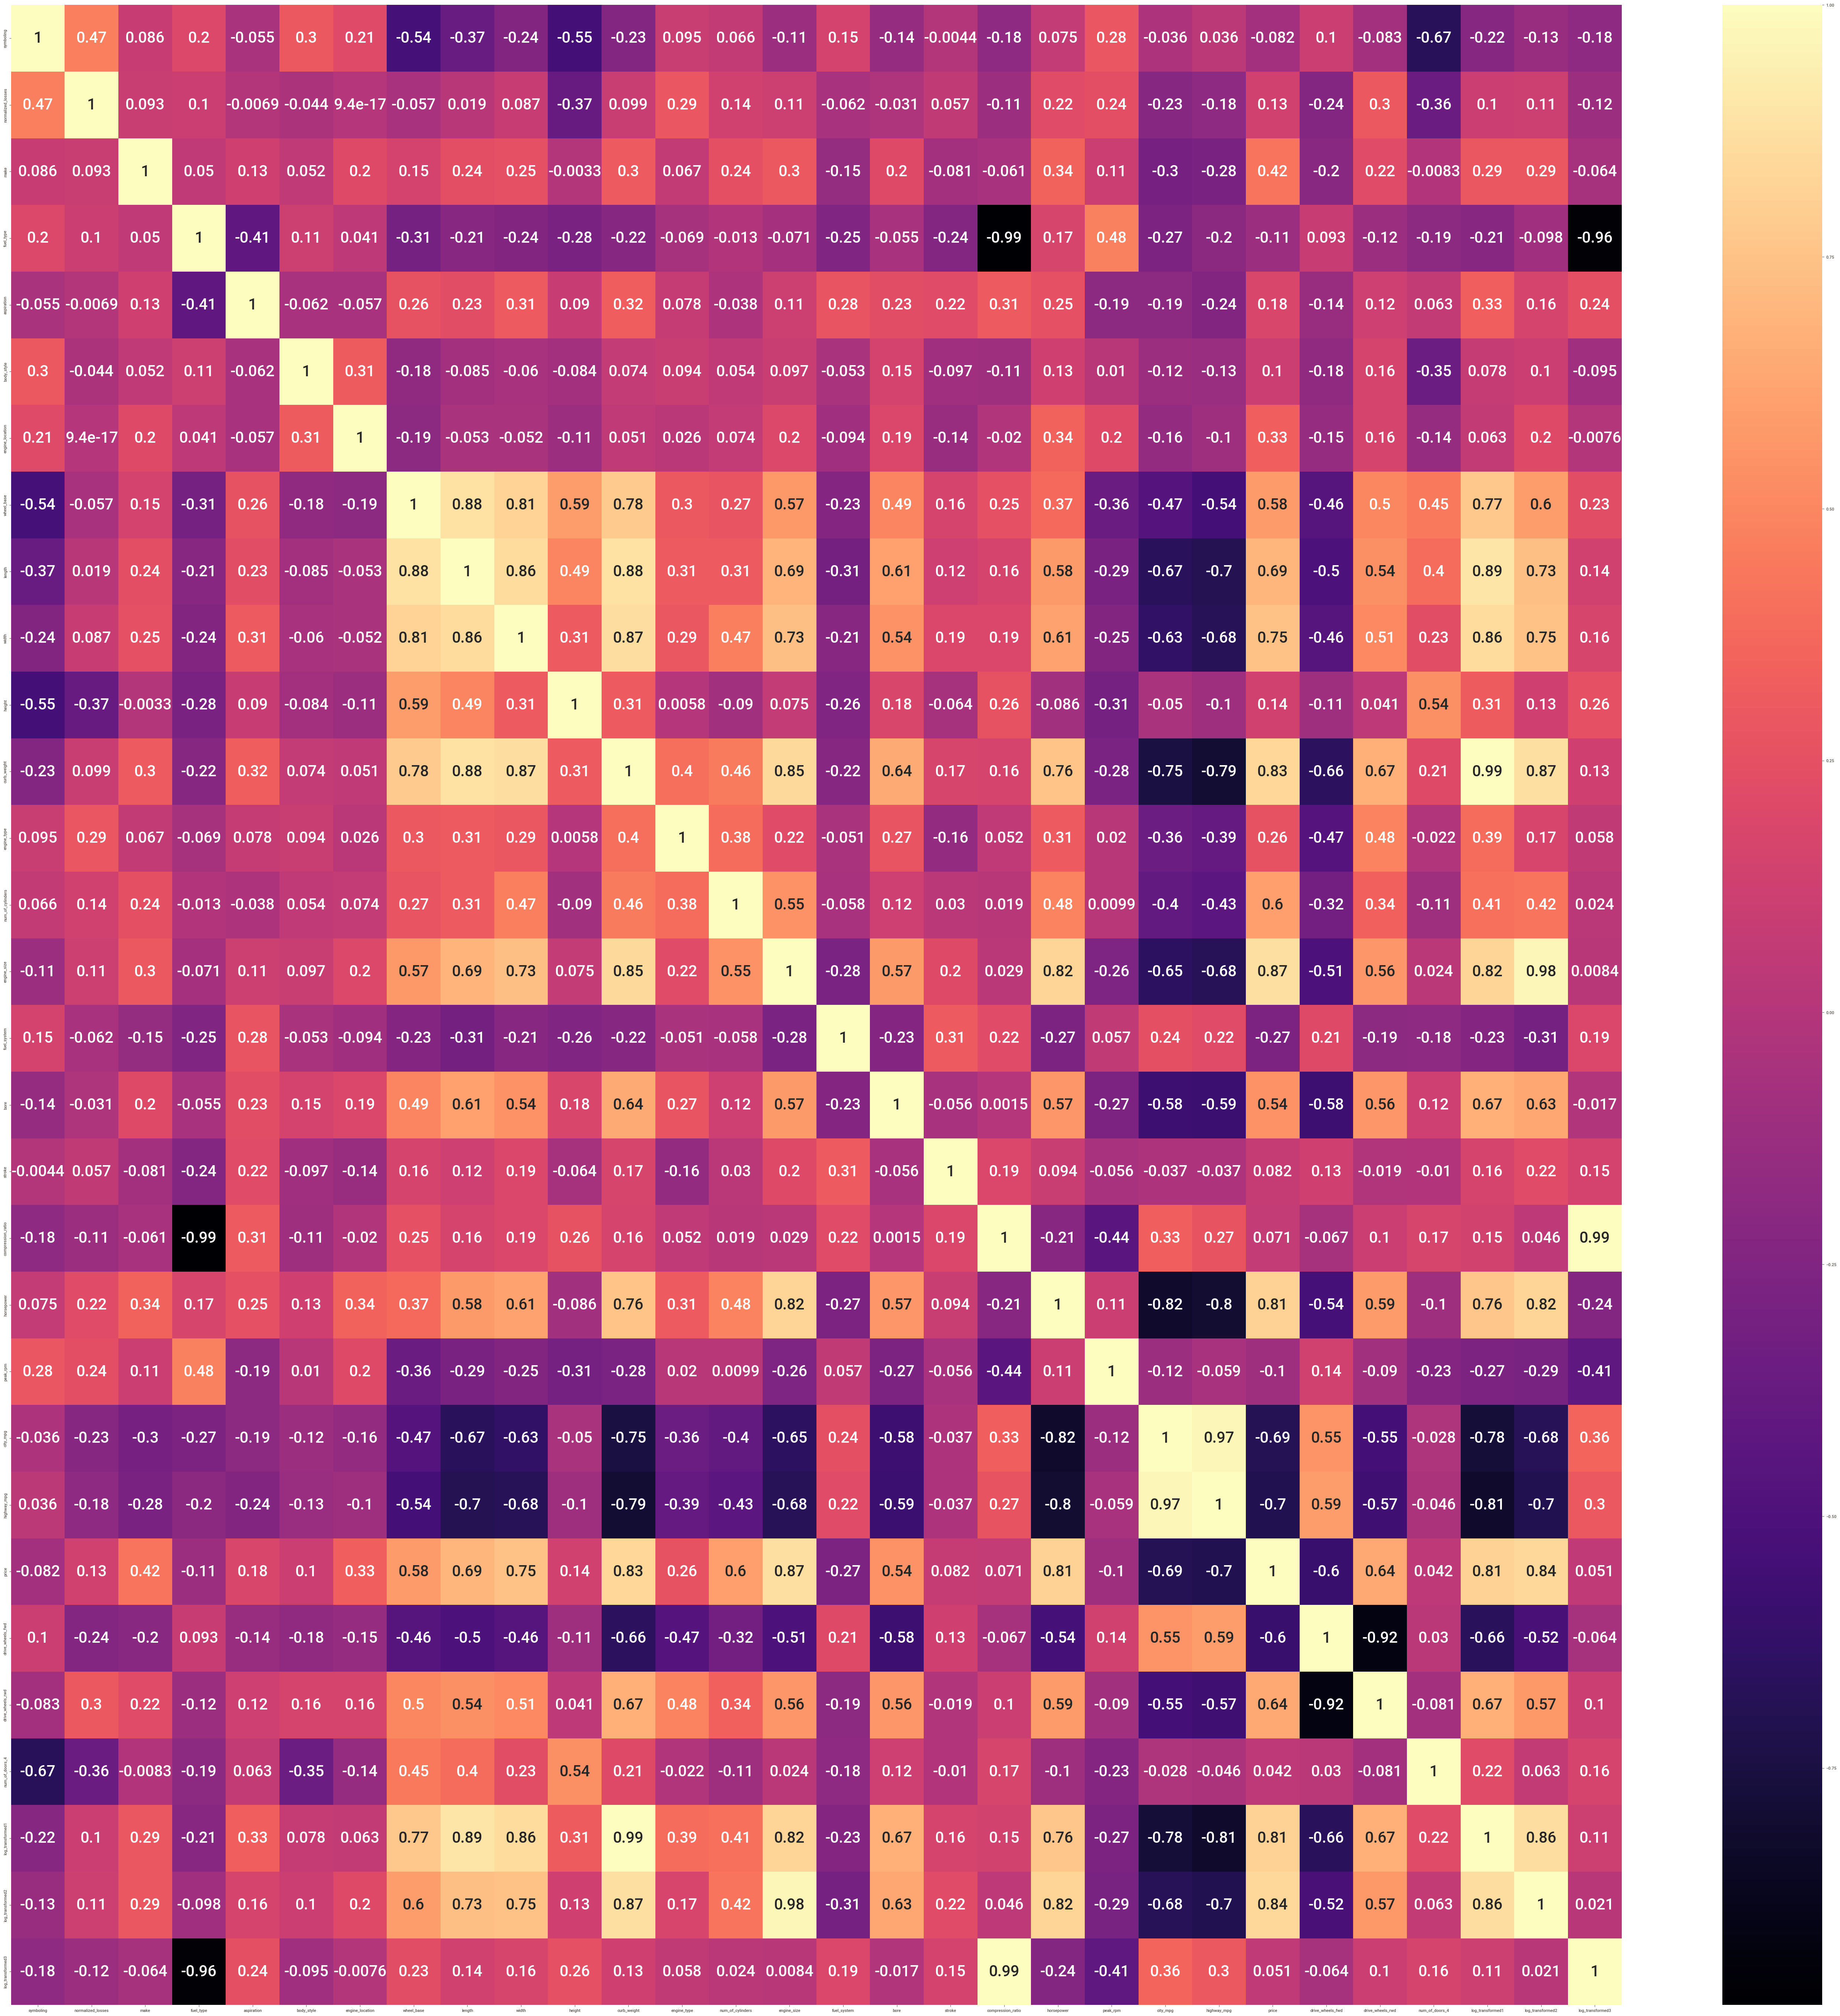

In [67]:
## Checking correlation
plt.figure(figsize=(70, 70))#canvas size
sns.heatmap(data.corr(), annot=True, cmap="magma", annot_kws={"size":30})

In [68]:
#insights from above heatmap
#decided to drop highway mpg,normalized_losses

In [69]:
data.drop(['highway_mpg'],axis=1,inplace=True)


In [70]:
data.drop(['normalized_losses'],axis=1,inplace=True)

In [71]:
data

symboling  make  fuel_type  aspiration  body_style  engine_location  \
0            3    19          1           0           5                0   
1            3    19          1           0           5                0   
2            1    19          1           0           2                0   
3            2    14          1           0           1                0   
4            2    14          1           0           1                0   
..         ...   ...        ...         ...         ...              ...   
196         -1     9          1           0           1                0   
197         -1     9          1           1           1                0   
198         -1     9          1           0           1                0   
199         -1     9          0           1           1                0   
200         -1     9          1           1           1                0   

     wheel_base  length  width  height  curb_weight  engine_type  \
0          88.6   168.8   64.1    48.8         2548            4   
1          88.6   168.8   64.1    48.8         2548            4   
2          94.5   171.2   65.5    52.4         2823            3   
3          99.8   176.6   66.2    54.3         2337            1   
4          99.4   176.6   66.4    54.3         2824            1   
..          ...     ...    ...     ...          ...          ...   
196       109.1   188.8   68.9    55.5         2952            1   
197       109.1   188.8   68.8    55.5         3049            1   
198       109.1   188.8   68.9    55.5         3012            3   
199       109.1   188.8   68.9    55.5         3217            1   
200       109.1   188.8   68.9    55.5         3062            1   

     num_of_cylinders  engine_size  fuel_system  bore  stroke  \
0                   1          130            1  3.47    2.68   
1                   1          130            1  3.47    2.68   
2                   2          152            1  2.68    3.47   
3                   1          109            1  3.19    3.40   
4                   3          136            1  3.19    3.40   
..                ...          ...          ...   ...     ...   
196                 1          141            1  3.78    3.15   
197                 1          141            1  3.78    3.15   
198                 2          173            1  3.58    2.87   
199                 2          145            3  3.01    3.40   
200                 1          141            1  3.78    3.15   

     compression_ratio  horsepower  peak_rpm  city_mpg  price  \
0                  9.0       111.0    5000.0        21  13495   
1                  9.0       111.0    5000.0        21  16500   
2                  9.0       154.0    5000.0        19  16500   
3                 10.0       102.0    5500.0        24  13950   
4                  8.0       115.0    5500.0        18  17450   
..                 ...         ...       ...       ...    ...   
196                9.5       114.0    5400.0        23  16845   
197                8.7       160.0    5300.0        19  19045   
198                8.8       134.0    5500.0        18  21485   
199               23.0       106.0    4800.0        26  22470   
200                9.5       114.0    5400.0        19  22625   

     drive_wheels_fwd  drive_wheels_rwd  num_of_doors_4  log_transformed1  \
0                   0                 1               0          7.843064   
1                   0                 1               0          7.843064   
2                   0                 1               0          7.945555   
3                   1                 0               1          7.756623   
4                   0                 0               1          7.945910   
..                ...               ...             ...               ...   
196                 0                 1               1          7.990238   
197                 0                 1               1          8.022569   
198                 

In [72]:
## Creating independent and dependent variable
X = data.loc[::,data.columns!='price']#independent variable 
y= data.loc[::,['price']] 

In [73]:
X.shape

(201, 27)

In [74]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scale_X = sc.fit_transform(X)
X = pd.DataFrame(scale_X,columns = X.columns)

In [75]:
## scaling data
#from sklearn.preprocessing import MinMaxScaler
#scale=MinMaxScaler() #Object Creation
#scale_X = scale.fit_transform(X)
#X = pd.DataFrame(scale_X,columns = X.columns)

In [76]:
X

symboling      make  fuel_type  aspiration  body_style  engine_location  \
0     1.725050  2.193170   0.332411   -0.467099    3.190798        -0.123091   
1     1.725050  2.193170   0.332411   -0.467099    3.190798        -0.123091   
2     0.127193  2.193170   0.332411   -0.467099    0.175044        -0.123091   
3     0.926121  1.263547   0.332411   -0.467099   -0.830208        -0.123091   
4     0.926121  1.263547   0.332411   -0.467099   -0.830208        -0.123091   
..         ...       ...        ...         ...         ...              ...   
196  -1.470664  0.333924   0.332411   -0.467099   -0.830208        -0.123091   
197  -1.470664  0.333924   0.332411    2.140872   -0.830208        -0.123091   
198  -1.470664  0.333924   0.332411   -0.467099   -0.830208        -0.123091   
199  -1.470664  0.333924  -3.008322    2.140872   -0.830208        -0.123091   
200  -1.470664  0.333924   0.332411    2.140872   -0.830208        -0.123091   

     wheel_base    length     width    height  curb_weight  engine_type  \
0     -1.685107 -0.439409 -0.853460 -2.034081    -0.014858     1.696971   
1     -1.685107 -0.439409 -0.853460 -2.034081    -0.014858     1.696971   
2     -0.710103 -0.244152 -0.185597 -0.559713     0.518080     0.952231   
3      0.165748  0.195176  0.148335  0.218425    -0.423766    -0.537251   
4      0.099646  0.195176  0.243744  0.218425     0.520017    -0.537251   
..          ...       ...       ...       ...          ...          ...   
196    1.702619  1.187733  1.436357  0.709881     0.768075    -0.537251   
197    1.702619  1.187733  1.388653  0.709881     0.956057    -0.537251   
198    1.702619  1.187733  1.436357  0.709881     0.884353     0.952231   
199    1.702619  1.187733  1.436357  0.709881     1.281633    -0.537251   
200    1.702619  1.187733  1.436357  0.709881     0.981250    -0.537251   

     num_of_cylinders  engine_size  fuel_system      bore    stroke  \
0           -0.423911     0.075389    -0.762184  0.522405 -1.831820   
1           -0.423911     0.075389    -0.762184  0.522405 -1.831820   
2            0.602669     0.606234    -0.762184 -2.431752  0.673776   
3           -0.423911    -0.431327    -0.762184 -0.524638  0.451761   
4            1.629248     0.220165    -0.762184 -0.524638  0.451761   
..                ...          ...          ...       ...       ...   
196         -0.423911     0.340812    -0.762184  1.681631 -0.341149   
197         -0.423911     0.340812    -0.762184  1.681631 -0.341149   
198          0.602669     1.112950    -0.762184  0.933744 -1.229208   
199          0.602669     0.437329     0.762184 -1.197737  0.451761   
200         -0.423911     0.340812    -0.762184  1.681631 -0.341149   

     compression_ratio  horsepower  peak_rpm  city_mpg  drive_wheels_fwd  \
0            -0.291435    0.206174 -0.248239 -0.652249         -1.192345   
1            -0.291435    0.206174 -0.248239 -0.652249         -1.192345   
2            -0.291435    1.359551 -0.248239 -0.964397         -1.192345   
3            -0.041121   -0.035230  0.799996 -0.184027          0.838683   
4            -0.541748    0.313465  0.799996 -1.120471         -1.192345   
..                 ...         ...       ...       ...               ...   
196          -0.166278    0.286643  0.590349 -0.340101         -1.192345   
197          -0.366529    1.520487  0.380702 -0.964397         -1.192345   
198          -0.341497    0.823097  0.799996 -1.120471         -1.192345   
199           3.212954    0.072061 -0.667532  0.128120         -1.192345   
200          -0.166278    0.286643  0.590349 -0.964397         -1.192345   

     drive_wheels_rwd  num_of_doors_4  log_transformed1  log_transformed2  \
0            1.296148       -1.156378          0.084214          0.239351   
1            1.296148       -1.156378          0.084214          0.239351   
2            1.296148       -1.156378          0.607535          0.795501   
3           -0.771517        0.864769         -0.357152         -0.38

# RandomForestRegressor

In [77]:
#model_creation:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

In [78]:
regressor=RandomForestRegressor(random_state=7)

# Create a Random Forest Regressor model
random_forest = RandomForestRegressor(n_estimators=50, random_state=7)

# Fit the model to the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(mse)

r2 = r2_score(y_test, y_pred)
print(r2)



6039016.223992215
0.9039255954953695


In [79]:
X_test.shape

(61, 27)

In [80]:
adjusted_randomforestRegressor_r2 = 1-(1-0.90)*(61-1)/(61-27-1)
adjusted_randomforestRegressor_r2

0.8181818181818182

 Hyperparameter tuning

In [82]:
# Define the model and hyperparameters you want to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

In [83]:
regressor=RandomForestRegressor(random_state=9)

In [84]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

In [85]:
# Fit the GridSearchCV object to your training data
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=9),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [86]:
# Get the best hyperparameters found by grid search
best_params = grid_search.best_params_
best_params

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [87]:
best_model = RandomForestRegressor(**best_params, random_state=7)

best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=7)

In [88]:
y_pred = best_model.predict(X_test)

In [89]:
# Evaluate the model (for regression, Mean Squared Error is a common metric)
mse1 = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse1}")

Mean Squared Error: 5832721.428047927


In [90]:
# You can also assess feature importance after training
feature_importances = random_forest.feature_importances_
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

Feature Importances:
symboling: 0.0009118166688684668
make: 0.00472747206208383
fuel_type: 0.0015563745181055467
aspiration: 0.0016975385667928604
body_style: 0.0015194261816372345
engine_location: 0.0
wheel_base: 0.008395808149184714
length: 0.006251322787215492
width: 0.022506221075101
height: 0.002909055452556568
curb_weight: 0.11255017188264917
engine_type: 0.0033501082379585405
num_of_cylinders: 0.0006665271540626497
engine_size: 0.334059726918675
fuel_system: 0.002605850681481029
bore: 0.009857008283646107
stroke: 0.006211009029251733
compression_ratio: 0.003289719692645263
horsepower: 0.01720090120213062
peak_rpm: 0.006617704059038336
city_mpg: 0.008919784906678595
drive_wheels_fwd: 0.0006431382678261051
drive_wheels_rwd: 0.0010087518673479927
num_of_doors_4: 0.00035147170078730987
log_transformed1: 0.1553004240405202
log_transformed2: 0.28421262791568724
log_transformed3: 0.0026800386980684126


In [91]:
rmse = np.sqrt(mse1)
rmse

2415.1027779471265

In [92]:
mae = mean_absolute_error(y_test, y_pred)
mae

1704.3678444479822

In [93]:
randomforestRegressor_r2 = r2_score(y_test, y_pred)
randomforestRegressor_r2

0.9072075289987125

In [94]:
X_test.shape

(61, 27)

In [95]:
## calculation of adjusted r2 score
adjusted_randomforestRegressor_r2 = 1-(1-0.90)*(61-1)/(61-27-1)
adjusted_randomforestRegressor_r2

0.8181818181818182

# ExtraTreesRegressor

In [96]:


from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)
model = ExtraTreesRegressor(n_estimators=100, random_state=9)
model.fit(X,y)

ExtraTreesRegressor(random_state=9)

In [97]:
## Feature Importance
print(model.feature_importances_)

[0.00309363 0.03422111 0.00067527 0.01129692 0.00306079 0.01606792
 0.01000366 0.01203105 0.02348228 0.00505284 0.11123202 0.00661423
 0.05938502 0.16135127 0.00620608 0.01723316 0.00481152 0.00399398
 0.05249863 0.01087144 0.05468052 0.00218716 0.07868883 0.00182709
 0.10849333 0.19602824 0.00491204]


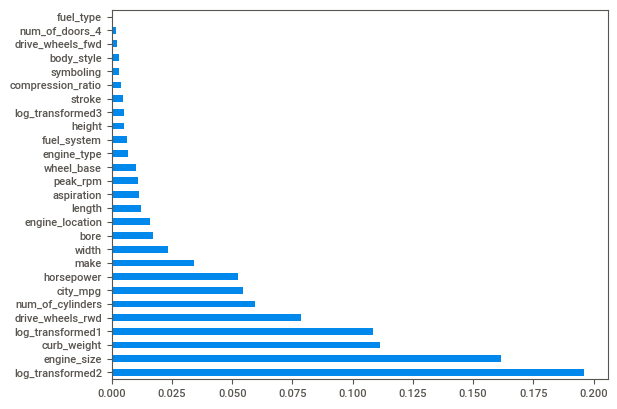

In [98]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(27).plot(kind='barh')
plt.show()

In [99]:
# select most important column.
x=data.loc[::,['fuel_system','aspiration','bore','length','engine_location','width','make','num_of_cylinders','horsepower','drive_wheels_rwd','city_mpg','curb_weight','log_transformed1','log_transformed2','engine_size']]

In [100]:
x.shape


(201, 15)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)
model = ExtraTreesRegressor(n_estimators=100, random_state=9)
model.fit(X,y)

ExtraTreesRegressor(random_state=9)

In [102]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 69655.28278688525


In [103]:
rmse = np.sqrt(mse)
rmse

263.9228727997732

In [104]:
r2_extratree = r2_score(y_test, y_pred)
r2_extratree

0.9988918576194968

In [105]:
X_test.shape

(61, 27)

In [106]:
adjusted_r2_extratree= 1-(1-0.99)*(61-1)/(61-27-1)
adjusted_r2_extratree

0.9818181818181818

In [107]:
# model with important features-(check how our model will work after selecting only important features) 

In [108]:

x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)
model = ExtraTreesRegressor(n_estimators=100, random_state=21)
model.fit(x,y)

ExtraTreesRegressor(random_state=21)

In [109]:
y_predict = model.predict(x_test)

mse = mean_squared_error(y_test, y_predict)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 77762.25


In [110]:
r2_imp = r2_score(y_test, y_predict)
r2_imp

0.9985510837598253

In [111]:
x_test.shape

(61, 15)

In [112]:
adjusted_r2_ext=1-(1-0.99)*(61-1)/(61-15-1)
adjusted_r2_ext

0.9866666666666667

# linear regression

In [113]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)
LR=LinearRegression() # object creation
LR.fit(X_train,y_train) # training of linear regression
y_predict=LR.predict(X_test)

In [114]:
y_test # Actual values

price
84    9279
60   10795
54   13645
109  16900
156   7738
..     ...
193  16515
15   41315
51    7395
6    17710
133  18620

[61 rows x 1 columns]

In [115]:
y_predict # Values predicted by model

array([[ 9380.90283585],
       [10474.45016464],
       [ 8125.00111285],
       [15379.84731681],
       [ 5844.06151512],
       [ 8787.8366952 ],
       [ 5174.47529956],
       [ 8090.64033886],
       [35377.62166664],
       [ 8121.61325766],
       [19708.94815692],
       [19925.58557932],
       [ 7097.23082472],
       [11128.77872318],
       [15154.67742622],
       [10490.74070483],
       [14111.58181531],
       [17579.91478823],
       [ 7562.23894264],
       [32385.79819232],
       [13215.89870575],
       [20372.77208698],
       [17893.8437028 ],
       [ 7598.21582727],
       [21354.25953718],
       [ 2621.83596285],
       [ 7214.47226525],
       [ 5553.62367317],
       [ 9235.73479131],
       [ 6378.97525178],
       [14893.71180302],
       [13283.47878445],
       [ 6838.78095258],
       [ 7056.38355022],
       [ 7678.57502575],
       [ 6551.92829451],
       [10135.30547307],
       [ 9192.47786445],
       [31944.66877421],
       [19675.53284614],


In [116]:
## Model Evalution

In [117]:
import math
print(mean_squared_error(y_test,y_predict))
print(math.sqrt(mean_squared_error(y_test,y_predict))) # root mean squared error

9419775.640047945
3069.1653002156704


In [118]:
r2score=r2_score(y_test,y_predict)
r2score

0.8501412644679794

In [119]:
X_test.shape


(61, 27)

In [120]:
print(mean_absolute_error(y_test,y_predict))

2070.699021427504


In [121]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.85)*(61-1)/(61-27-1)
adjusted_r2

0.7272727272727273

In [122]:
# Hyperparameter tuning:

In [123]:
from sklearn.linear_model import Ridge

In [124]:
# Create a linear regression model
model = Ridge()

In [125]:
# Define the hyperparameters to tune
param_grid = { 'alpha': [0.01, 0.1, 1.0, 3.0,9.0,10.0,34.0,38]}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=7)

# Fit the model to your data
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_params


{'alpha': 38}

In [126]:
tuned_model = Ridge(**best_params)

tuned_model.fit(X_train, y_train)

Ridge(alpha=38)

In [127]:
y_pred = tuned_model.predict(X_test)

In [128]:
mse = mean_squared_error(y_test, y_pred)
mse

9879819.692665324

In [129]:
linear_tuned_r2=r2_score(y_test,y_pred)
linear_tuned_r2

0.8428224468391218

In [130]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.85)*(61-1)/(61-27-1)
adjusted_r2

0.709090909090909

# ANN model


In [131]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [132]:
#model creation
from keras.models import Sequential
from keras.layers import Dense

# Create an ANN model
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=27))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [133]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [134]:

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=27, verbose=1)

Epoch 1/50
6/6 [==============================] - 1s 5ms/step - loss: 234489312.0000
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 234475584.0000
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 234462768.0000
Epoch 4/50
6/6 [==============================] - 0s 3ms/step - loss: 234449232.0000
Epoch 5/50
6/6 [==============================] - 0s 3ms/step - loss: 234434864.0000
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - loss: 234418720.0000
Epoch 7/50
6/6 [==============================] - 0s 3ms/step - loss: 234399360.0000
Epoch 8/50
6/6 [==============================] - 0s 2ms/step - loss: 234377968.0000
Epoch 9/50
6/6 [==============================] - 0s 3ms/step - loss: 234351920.0000
Epoch 10/50
6/6 [==============================] - 0s 3ms/step - loss: 234322544.0000
Epoch 11/50
6/6 [==============================] - 0s 2ms/step - loss: 234287152.0000
Epoch 12/50
6/6 [==============================] - 0s 3ms/step 

In [135]:

# Make predictions on the test set
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 0s/step


In [136]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mse

229183060.44852835

In [137]:
r2

-2.6460617488762495

In [138]:
X_test.shape

(61, 27)

In [139]:
adjusted_r2=1-(1-(-2))*(1-61)/(61-27-1)
adjusted_r2

6.454545454545454

# DecisionTreeRegressor

In [140]:
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

In [141]:
# Create a Decision Tree Regressor model
model = DecisionTreeRegressor(max_depth=10)

In [142]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [143]:
y_pred = model.predict(X_test)

In [144]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 14794431.836065574


In [145]:
r2score=r2_score(y_test,y_pred)
r2score

0.7646361301386397

In [146]:
Adjusted_r2_decisiontree=1-(1-0.79)*(61-1)/(61-27-1)
Adjusted_r2_decisiontree

0.6181818181818182

In [147]:
# hyperparametertuning:
from sklearn.model_selection import RandomizedSearchCV

In [148]:
# Define the parameter distribution
param_dist = {
    'max_depth': [None, 5, 10, 15, 20,30,40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
}

# Create the Decision Tree Regressor
tree_regressor = DecisionTreeRegressor()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(tree_regressor, param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error')

# Fit the RandomizedSearchCV object to your training data
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': [None, 5, 10, 15, 20, 30,
                                                      40],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   scoring='neg_mean_squared_error')

In [149]:
# Get the best Decision Tree Regressor model
best_tree_regressor = random_search.best_estimator_

# Evaluate the best model on your test data using the chosen regression metric
mse = mean_squared_error(y_test, best_tree_regressor.predict(X_test))
mse

12926810.980963532

In [150]:
r2score=r2_score(y_test,best_tree_regressor.predict(X_test))
r2score

0.7943480161212445

In [180]:
Adjusted_r2_decisiontree=1-(1-0.79)*(61-1)/(61-27-1)
Adjusted_r2_decisiontree

0.6181818181818182

# support vector machine(SVM)

In [152]:
from sklearn.svm import SVR
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

In [153]:
# Create an SVR model
model = SVR(kernel='linear', C=1.0)

In [154]:
# Train the model on the training data
model.fit(X_train, y_train)

SVR(kernel='linear')

In [155]:
y_pred=model.predict(X_test)


In [156]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 59256360.91066663


In [157]:
r2_svr=r2_score(y_test,y_predict)
r2_svr

0.8501412644679794

In [158]:
Adjusted_r2_svr=1-(1-0.85)*(61-1)/(61-27-1)
Adjusted_r2_svr

0.7272727272727273

In [159]:
# hyperparameter tuning

In [160]:
  # defining parameter range
param_grid = {'C': [0.1, 5, 10,25,100,1000,14000,15000,16000,17000,18000], 
              'gamma': [1, 0.01, 0.02, 0.03, 0.05,0.9,3]} 
model=SVR()
grid = GridSearchCV(model, param_grid, refit = True, verbose = 5,scoring='neg_mean_squared_error',cv=5)
  
# fitting the model for grid search
grid.fit(X,y)

Fitting 5 folds for each of 77 candidates, totalling 385 fits
[CV 1/5] END ............C=0.1, gamma=1;, score=-80692751.641 total time=   0.0s
[CV 2/5] END ...........C=0.1, gamma=1;, score=-175747805.759 total time=   0.0s
[CV 3/5] END ............C=0.1, gamma=1;, score=-19273490.703 total time=   0.0s
[CV 4/5] END ............C=0.1, gamma=1;, score=-56313686.318 total time=   0.0s
[CV 5/5] END ............C=0.1, gamma=1;, score=-27944979.297 total time=   0.0s
[CV 1/5] END .........C=0.1, gamma=0.01;, score=-80672135.798 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=0.01;, score=-175706937.603 total time=   0.0s
[CV 3/5] END .........C=0.1, gamma=0.01;, score=-19263028.167 total time=   0.0s
[CV 4/5] END .........C=0.1, gamma=0.01;, score=-56304572.285 total time=   0.0s
[CV 5/5] END .........C=0.1, gamma=0.01;, score=-27936311.042 total time=   0.0s
[CV 1/5] END .........C=0.1, gamma=0.02;, score=-80666180.115 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=0.02;, score=

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 5, 10, 25, 100, 1000, 14000, 15000, 16000,
                               17000, 18000],
                         'gamma': [1, 0.01, 0.02, 0.03, 0.05, 0.9, 3]},
             scoring='neg_mean_squared_error', verbose=5)

In [161]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 18000, 'gamma': 0.01}


In [162]:
model1=SVR(C=18000, gamma=0.01) 
model1

SVR(C=18000, gamma=0.01)

In [163]:
model1.fit(X_train,y_train)

SVR(C=18000, gamma=0.01)

In [164]:
y_pred1=model1.predict(X_test)

In [165]:
mse1 = mean_squared_error(y_test, y_pred1)
mse1

8165671.144050474

In [166]:
r2_svr_htuning=r2_score(y_test,y_pred1)
r2_svr_htuning

0.870092749638835

In [167]:
adjusted_r2_svr_htuning=1-(1-0.87)*(61-1)/(61-27-1)
adjusted_r2_svr_htuning

0.7636363636363637

#  GradientBoostingRegressor

In [168]:
from sklearn.ensemble import GradientBoostingRegressor

In [169]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=7)

In [170]:
model.fit(X_train,y_train)

GradientBoostingRegressor(random_state=7)

In [171]:
y_pred=model.predict(X_test)
y_pred

array([ 9551.50003851,  9690.42737476, 10870.75692824, 13834.79831324,
        7314.56650828,  8816.52656917,  9394.05232226,  8249.47965877,
       34324.10499136, 10870.75692824, 16333.86571687, 18416.54134949,
        7314.56650828, 12891.24871695, 15326.04369972,  9586.35472439,
        9928.22220427, 16150.35217293,  8613.16841467, 35968.25129902,
       13399.22949806, 21391.1826548 , 16881.32510205,  6497.88859278,
       18353.067566  ,  6363.77161039,  6719.6829308 ,  6550.34535407,
        9746.81586226,  5735.37720896, 16252.59797305, 14022.67311266,
        7081.31319299,  6078.76924265,  9394.05232226,  7365.74428983,
        8880.34042395, 12578.4019229 , 35397.90015035, 19841.97988292,
        6662.35508741, 11559.14304204, 11677.6642477 , 13109.3124284 ,
        5690.92991371, 13630.07667761, 26652.14181882,  6357.07867596,
       21521.08239898,  6198.06598841, 16461.88806292,  6497.88859278,
       13046.37832729, 13046.37832729,  7208.14465003, 13834.79831324,
      

In [172]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 5262852.278058295


In [173]:
r2_gboost=r2_score(y_test,y_pred)
r2_gboost

0.9162735485621805

In [174]:
adjusted_r2_gboost=1-(1-0.91)*(61-1)/(61-27-1)
adjusted_r2_gboost

0.8363636363636364

In [175]:
# hyperparameter_tuning

In [178]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
             }

# Create the Gradient Boosting regressor
gbm = GradientBoostingRegressor()

In [179]:
# Create the GridSearchCV object
grid_search = GridSearchCV(gbm, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to your training data
grid_search.fit(X_train, y_train)

# Get the best Gradient Boosting model
best_gbm = grid_search.best_estimator_

y_pred= best_gbm.predict(X_test)

# Evaluate the best model on your test data using the chosen regression metric
mse = mean_squared_error(y_test,y_pred)

In [181]:
mse

5149041.230091584

In [182]:
r2_gboost_tuning=r2_score(y_test,y_pred)
r2_gboost_tuning

0.9180841627837499

In [183]:
adjusted_r2_gboost_htuning=1-(1-0.91)*(61-1)/(61-27-1)
adjusted_r2_gboost_htuning

0.8363636363636364

# knn

In [185]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

In [186]:
# Define a range of 'k' values to test
k_values = list(range(1, 10))  # Test k from 1 to 10

# Initialize lists to store cross-validation scores
mse_scores = []

# Perform cross-validation for each 'k' value
for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    # Perform 5-fold cross-validation (you can adjust the number of folds)
    scores = -cross_val_score(knn_regressor, X, y, cv=5, scoring='neg_mean_squared_error')
    # Calculate the mean squared error scores (negative because sklearn returns negative MSE)
    mse_scores.append(np.mean(scores))
    
    
    # Find the best 'k' value that minimizes MSE
best_k = k_values[np.argmin(mse_scores)]
print(f"The best k value is: {best_k}")

The best k value is: 3


In [187]:
k = 3
knn_regressor = KNeighborsRegressor(n_neighbors=k)

In [188]:
knn_regressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [189]:
y_pred=knn_regressor.predict(X_test)
y_pred

array([[ 8385.66666667],
       [ 7893.66666667],
       [ 9927.        ],
       [14711.66666667],
       [ 6943.66666667],
       [ 8582.66666667],
       [ 8707.66666667],
       [ 7591.66666667],
       [31024.66666667],
       [ 9927.        ],
       [15228.66666667],
       [15228.66666667],
       [ 7498.        ],
       [ 8895.        ],
       [13731.        ],
       [10818.66666667],
       [12432.33333333],
       [15228.66666667],
       [ 8456.33333333],
       [27032.33333333],
       [11338.33333333],
       [19998.33333333],
       [17260.        ],
       [ 6537.66666667],
       [22333.33333333],
       [ 6115.33333333],
       [ 7071.        ],
       [ 6235.66666667],
       [11602.33333333],
       [ 5752.        ],
       [12277.66666667],
       [13294.        ],
       [ 7238.66666667],
       [ 6235.66666667],
       [ 8707.66666667],
       [ 7022.33333333],
       [ 7419.33333333],
       [ 7609.66666667],
       [34396.66666667],
       [20118.33333333],


In [190]:
mse_knn=mean_squared_error(y_test,y_pred)
mse_knn

9301406.10928962

In [191]:
mae_knn=mean_absolute_error(y_test,y_pred)
mae_knn

2099.0163934426228

In [192]:
r2_knn=r2_score(y_test,y_pred)
r2_knn

0.8520243993623547

In [193]:
X_test.shape

(61, 27)

In [194]:
adjusted_r2_knn =1-(1-0.87)*(61-1)/(61-27-1)
adjusted_r2_knn

0.7636363636363637

In [195]:
#hyperparameter_Tuning:

In [196]:
# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create the KNN regressor
knn = KNeighborsRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to your training data
grid_search.fit(X_train, y_train)

# Get the best KNN regression model
best_knn = grid_search.best_estimator_

# Evaluate the best model on your test data using the chosen regression metric
mse = mean_squared_error(y_test, best_knn.predict(X_test))
mse

8055551.130511782

In [197]:
r2=r2_score(y_test,best_knn.predict(X_test))
r2

0.8718446433798618

In [198]:
Adjusted_r2=1-(1-0.90)*(61-1)/(61-27-1)
Adjusted_r2 

0.8181818181818182

In [199]:
#Report on Challenges faced:


#1)data does not have a column header,so we corrected that first#
#2)normalized_losses has 37 ? values,we convert them into mean values.
#3)column which has a more than 6 unique values,we did manual encoding for them.this way we can controll the number of columns.
#4)box plot shows outlier in some column,but when we analysis them,we find they are useful for our data as we have to predict car with lowest price(5100) to highest price(45,400).
#  so,we decided to do log transformation for that column.
#5)we did hyperparameter tuning to improve the score.we used gridsearchcv and randomizedsearchcv for hyperparameter tuning.

# Model Comparison Report


Table:
 

| ML model_name           |   mse_value   |  r2_score | r2 with hpm-tuning |Adjusted_r2|
|:----------------------- |:-------------:|:---------:|:------------------:|:---------:|
|RandomForestRegressor    |  5832721      |     0.90  |    0.90            |  0.81     |
|ExtraTreesRegressor      | 106201        |     0.99  |    0.99            |0.98       |
|LinearRegression         | 9879819       |      0.85 |    0.85            | 0.72      |
|DecisionTreeRegressor    |12926810       |     0.76  |    0.79            |  0.61     |
|support vector machine   |8165671        | 0.85      |    0.87            |  0.76     |
|GradientBoostingRegressor|5149041        |     0.91  |   0.91             |   0.83    |
|KNeighborsRegressor      |9301406        |      0.85 |   0.87             |   0.81    |
|ANN                      |229183060      |    -2.79  |                    |           |



#### ExtraTreesRegressor machine learning model gives highest 99% r2_score and 0.98% adjusted r2_score.so we suggested to choose extratreeRegressor model for production.
##### Through feature_importance function,we can suggest most important factors are :'[fuel_system', 'peak_rpm', 'aspiration', 'bore', 'length', 'engine_location', 'width', 'make', 'num_of_cylinders', 'horsepower', 'drive_wheels', 'city_mpg', 'curb_weight' , 'engine_size']

In [200]:
# "Please provide us with your valuable feedback to help us make further improvements to this project."